## tradeSeq for DE along the Mullerian duct developmental trajectory

In [1]:
#if (!require("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")

#BiocManager::install("tradeSeq")

In [2]:
library(tradeSeq)
library(SingleCellExperiment)
library(slingshot)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [3]:
adata <- readRDS('/nfs/team292/vl6/FetalReproductiveTract/mullerian_early.rds')

In [4]:
adata

class: SingleCellExperiment 
dim: 20908 6923 
metadata(1): leiden_colors
assays(1): X
rownames(20908): A1BG A1BG-AS1 ... ZYX ZZEF1
rowData names(297): GeneID.0 GeneName.0 ... n_counts n_cells
colnames(6923): HD_F_GON13679794_CGGAGCTAGTTAAGTG
  HD_F_GON13679794_GTATCTTCAAGCGCTC ...
  HD_F_GON9480066_AAACGGGGTACTCGCG HD_F_GON9480066_GTAGGCCAGGTGGGTT
colData names(42): n_counts n_genes ... celltype phase
reducedDimNames(3): X_draw_graph_fa PCA UMAP
altExpNames(0):

In [5]:
adata <- slingshot(adata, clusterLabels = 'leiden', 
                   start.clus = "4", end.clus = c("0", "2", "3"), reducedDim = 'X_draw_graph_fa', 
                  )

Using full covariance matrix



In [6]:
counts <- assay(adata, "X")


In [7]:
adata


class: SingleCellExperiment 
dim: 20908 6923 
metadata(1): leiden_colors
assays(1): X
rownames(20908): A1BG A1BG-AS1 ... ZYX ZZEF1
rowData names(297): GeneID.0 GeneName.0 ... n_counts n_cells
colnames(6923): HD_F_GON13679794_CGGAGCTAGTTAAGTG
  HD_F_GON13679794_GTATCTTCAAGCGCTC ...
  HD_F_GON9480066_AAACGGGGTACTCGCG HD_F_GON9480066_GTAGGCCAGGTGGGTT
colData names(45): n_counts n_genes ... slingPseudotime_2
  slingPseudotime_3
reducedDimNames(3): X_draw_graph_fa PCA UMAP
altExpNames(0):

In [8]:
head(colData(adata)$slingPseudotime_1)

[1] 25813.03 11501.97 25978.34 26211.81       NA 26235.81

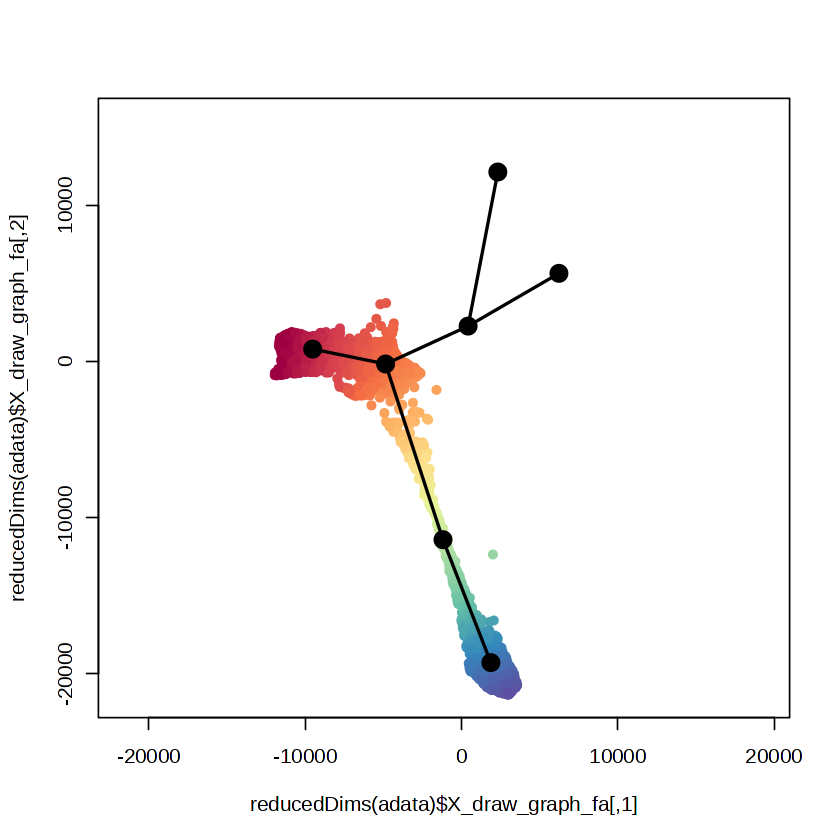

In [9]:
library(grDevices)
library(RColorBrewer)
colors <- colorRampPalette(brewer.pal(11,'Spectral')[-6])(100)
plotcol <- colors[cut(adata$slingPseudotime_1, breaks=100)]

plot(reducedDims(adata)$X_draw_graph_fa, col = plotcol, pch=16, asp = 1)
lines(SlingshotDataSet(adata), type = 'lineages' , lwd=2, col='black')

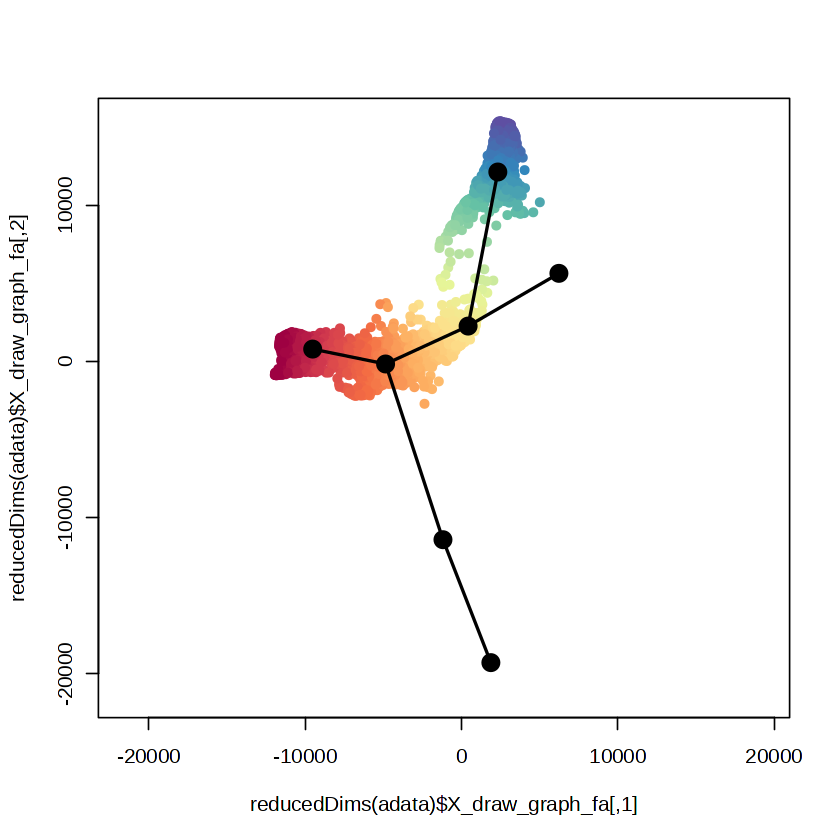

In [10]:
library(grDevices)
library(RColorBrewer)
colors <- colorRampPalette(brewer.pal(11,'Spectral')[-6])(100)
plotcol <- colors[cut(adata$slingPseudotime_2, breaks=100)]

plot(reducedDims(adata)$X_draw_graph_fa, col = plotcol, pch=16, asp = 1)
lines(SlingshotDataSet(adata), type = 'lineages' , lwd=2, col='black')

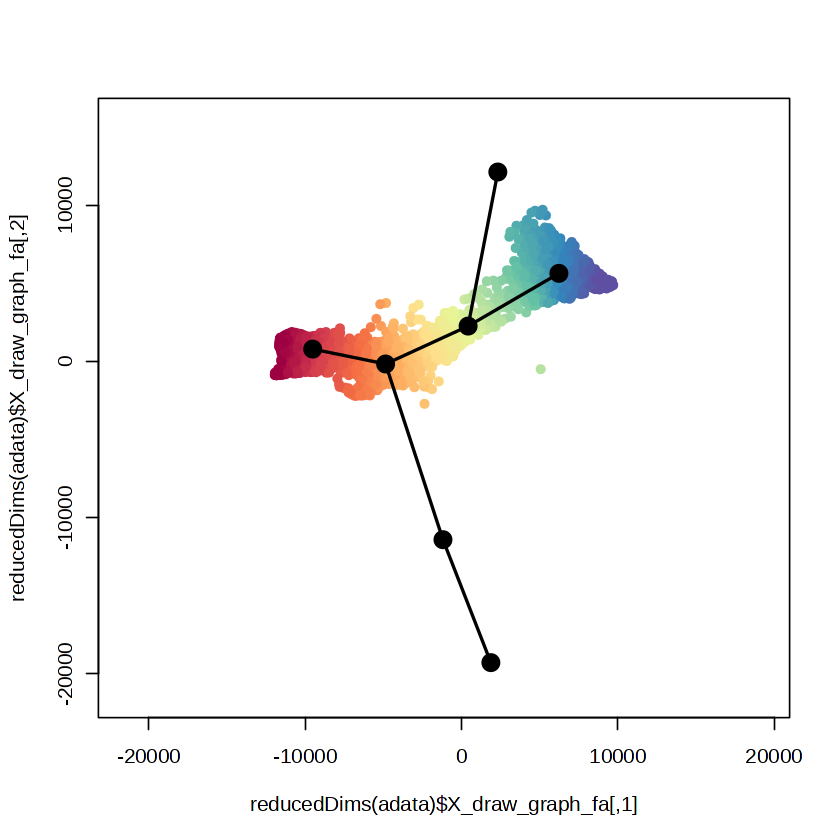

In [11]:
library(grDevices)
library(RColorBrewer)
colors <- colorRampPalette(brewer.pal(11,'Spectral')[-6])(100)
plotcol <- colors[cut(adata$slingPseudotime_3, breaks=100)]

plot(reducedDims(adata)$X_draw_graph_fa, col = plotcol, pch=16, asp = 1)
lines(SlingshotDataSet(adata), type = 'lineages' , lwd=2, col='black')

In [12]:
adata

class: SingleCellExperiment 
dim: 20908 6923 
metadata(1): leiden_colors
assays(1): X
rownames(20908): A1BG A1BG-AS1 ... ZYX ZZEF1
rowData names(297): GeneID.0 GeneName.0 ... n_counts n_cells
colnames(6923): HD_F_GON13679794_CGGAGCTAGTTAAGTG
  HD_F_GON13679794_GTATCTTCAAGCGCTC ...
  HD_F_GON9480066_AAACGGGGTACTCGCG HD_F_GON9480066_GTAGGCCAGGTGGGTT
colData names(45): n_counts n_genes ... slingPseudotime_2
  slingPseudotime_3
reducedDimNames(3): X_draw_graph_fa PCA UMAP
altExpNames(0):

In [13]:
slotNames(SlingshotDataSet(adata))

[1] "reducedDim"    "clusterLabels" "lineages"      "adjacency"    
[5] "curves"        "slingParams"

In [14]:
SlingshotDataSet(adata)@lineages

$Lineage1
[1] "4" "1" "5" "3"

$Lineage2
[1] "4" "1" "6" "2"

$Lineage3
[1] "4" "1" "6" "0"

In [15]:
 brewer.pal(9,'Set1')

[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33" "#A65628"
[8] "#F781BF" "#999999"

In [16]:
sort(unique(adata$leiden))

[1] 0 1 2 3 4 5 6
Levels: 0 1 2 3 4 5 6

In [17]:
brewer.pal(9,'Set1')

[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33" "#A65628"
[8] "#F781BF" "#999999"

In [18]:
palette = c('#9ACD32', '#EEE8AA', '#008080', '#ffa60b', '#BDB76B', '#FFD700', '#ADFF2F')

In [19]:
pdf('/home/jovyan/RepTract/FA_lineages.pdf', width = 6, height = 6.5)
plot(reducedDims(adata)$X_draw_graph_fa, col = palette[adata$leiden], pch=16, asp = 0.4)
lines(SlingshotDataSet(adata), type = 'lineages' , lwd=1.5, col='black')
legend("topright", legend=sort(unique(adata$leiden)), title="leiden", 
       col = palette, pch = 16) 
dev.off()

pdf 
  2

In [20]:
palette_stage = c('#440154', '#482878', '#3e4989', '#31688e', '#26828e', '#1f9e89', '#35b779', '#6ece58', '#b5de2b', '#fde725')

In [21]:
pdf('/home/jovyan/RepTract/FA_stages.pdf', width = 6, height = 6)
plot(reducedDims(adata)$X_draw_graph_fa, col = adata$stage_pcw, palette = palette_stage, pch=16, asp = 0.7)
#lines(SlingshotDataSet(adata), type = 'lineages' , lwd=2, col='black')
#legend("topright", legend=sort(unique(adata$stage)), title="stage", 
#       col = palette, pch = 16) 
dev.off()

Warning message in plot.window(...):
“"palette" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"palette" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"palette" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"palette" is not a graphical parameter”
Warning message in box(...):
“"palette" is not a graphical parameter”
Warning message in title(...):
“"palette" is not a graphical parameter”


pdf 
  2

In [22]:
palette_sex = c('#FFB6C1', '#AFEEEE')

In [23]:
adata$sex <- factor(adata$sex, levels = c("female", "male"))

In [24]:
pdf('/home/jovyan/RepTract/FA_sex.pdf', width = 6, height = 6.5)
palette_sex_transparent <- sapply(palette_sex, adjustcolor)
plot(reducedDims(adata)$X_draw_graph_fa, col = palette_sex_transparent[adata$sex], pch=16, asp = 0.4)
#lines(SlingshotDataSet(adata), type = 'lineages' , lwd=2, col='black')
legend("topright", legend=sort(unique(adata$sex)), title="sex", 
       col = palette_sex, pch = 16) 
dev.off()

pdf 
  2

In [25]:
adata

class: SingleCellExperiment 
dim: 20908 6923 
metadata(1): leiden_colors
assays(1): X
rownames(20908): A1BG A1BG-AS1 ... ZYX ZZEF1
rowData names(297): GeneID.0 GeneName.0 ... n_counts n_cells
colnames(6923): HD_F_GON13679794_CGGAGCTAGTTAAGTG
  HD_F_GON13679794_GTATCTTCAAGCGCTC ...
  HD_F_GON9480066_AAACGGGGTACTCGCG HD_F_GON9480066_GTAGGCCAGGTGGGTT
colData names(45): n_counts n_genes ... slingPseudotime_2
  slingPseudotime_3
reducedDimNames(3): X_draw_graph_fa PCA UMAP
altExpNames(0):

In [26]:
SlingshotDataSet(adata)

class: SlingshotDataSet 

 Samples Dimensions
    6923          2

lineages: 3 
Lineage1: 4  1  5  3  
Lineage2: 4  1  6  2  
Lineage3: 4  1  6  0  

curves: 3 
Curve1: Length: 28926	Samples: 3173.47
Curve2: Length: 25009	Samples: 3134.1
Curve3: Length: 22067	Samples: 3830.78

In [27]:
set.seed(7)
pseudotime <- slingPseudotime(SlingshotDataSet(adata), na = FALSE)
cellWeights <- slingCurveWeights(SlingshotDataSet(adata))

In [28]:
library(scran)

In [29]:
libsizes <- colSums(counts)
size.factors <- libsizes/mean(libsizes)
logcounts(adata) <- log2(t(t(counts)/size.factors) + 1)
assayNames(adata)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.1 GiB”


[1] "X"         "logcounts"

In [30]:
# Filter genes with non-zero biological components
getVariableGenes <- function(adata,fdr_thresh=NULL,var_thresh=0) {
  gene_var <- modelGeneVar(adata)
  genes <- getTopHVGs(gene_var, var.threshold =var_thresh ,fdr.threshold = fdr_thresh)
  return(genes)
}

In [31]:
genes <- getVariableGenes(adata)

In [32]:
length(genes)

[1] 11398

In [33]:
dim(counts[genes,])

[1] 11398  6923

In [34]:
# icMat <- evaluateK(counts = counts, sds = SlingshotDataSet(adata), k = 5:15, 
#                    nGenes = 200, verbose = T)

In [ ]:
sce <- fitGAM(counts = counts[genes,], pseudotime = pseudotime, cellWeights = cellWeights, nknots = 8,
                verbose = TRUE, parallel = TRUE)

  |============================================================          |  85%

In [ ]:
table(rowData(sce)$tradeSeq$converged)

In [ ]:
adata <- adata[genes, ]

In [ ]:
adata

In [ ]:
saveRDS(sce, "/nfs/team292/vl6/FetalReproductiveTract/mullerian_emergence_gam.rds")

In [3]:
sce <- readRDS('/nfs/team292/vl6/FetalReproductiveTract/mullerian_emergence_gam.rds')

In [40]:
sce

class: SingleCellExperiment 
dim: 11398 6923 
metadata(1): tradeSeq
assays(1): counts
rownames(11398): FOS SULT1E1 ... SZT2 AC078777.1
rowData names(1): tradeSeq
colnames(6923): HD_F_GON13679794_CGGAGCTAGTTAAGTG
  HD_F_GON13679794_GTATCTTCAAGCGCTC ...
  HD_F_GON9480066_AAACGGGGTACTCGCG HD_F_GON9480066_GTAGGCCAGGTGGGTT
colData names(2): slingshot tradeSeq
reducedDimNames(0):
altExpNames(0):

In [41]:
assoRes <- associationTest(sce, lineages = TRUE)
head(assoRes)

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FOS,677.9505,18,0,180.2075,7,0,296.7841,6,0,200.95889,5,0.000000e+00,0.3998477
SULT1E1,5512.0465,18,0,4900.2865,7,0,138.5672,6,0,473.19276,5,0.000000e+00,0.6319572
FN1,6112.9406,18,0,217.9225,7,0,2662.3227,6,0,3232.69546,5,0.000000e+00,0.8172136
COL3A1,9919.2565,18,0,9586.5636,7,0,270.7830,6,0,61.90992,5,4.895084e-12,0.5072567
SFRP1,6068.2893,18,0,2530.3997,7,0,2247.7855,6,0,1290.10419,5,0.000000e+00,0.6847747
LGALS1,3426.0874,18,0,317.0839,7,0,1675.6427,6,0,1433.36076,5,0.000000e+00,0.7030045


In [150]:
write.csv(assoRes, file = "/home/jovyan/SupplementaryTable6.csv")


In [42]:
dim(assoRes)

[1] 11398    13

In [43]:
assoRes['PNOC',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PNOC,1784.643,18,0,1532.485,7,0,79.51427,6,4.551914e-15,172.6445,5,0,1.147799


In [44]:
assoRes['TMEM163',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TMEM163,776.5026,18,0,5.087393,7,0.649299,81.18085,6,1.998401e-15,690.2344,5,0,1.057138


In [45]:
assoRes['SP7',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SP7,546.1996,18,0,68.5746,7,2.866485e-12,412.4925,6,0,65.13255,5,1.051936e-12,0.8367558


In [46]:
assoRes['MMP28',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MMP28,824.1931,18,0,218.4074,7,0,88.38915,6,1.110223e-16,517.3965,5,0,0.6856717


In [47]:
assoRes['RXRG',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RXRG,355.4893,18,0,250.4446,7,0,50.42496,6,3.863462e-09,54.61973,5,1.56296e-10,0.9285602


In [48]:
assoRes['FGF20',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FGF20,487.1908,18,0,476.6658,7,0,5.753084,6,0.4514104,4.771934,5,0.4443429,0.5747341


In [49]:
assoRes['LYPD1',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LYPD1,1890.677,18,0,1175.754,7,0,306.541,6,0,408.3816,5,0,0.7579407


In [50]:
assoRes['WIF1',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WIF1,506.08,18,0,71.20669,7,8.423262e-13,364.7013,6,0,70.17207,5,9.436896e-14,0.8416903


In [51]:
assoRes['GDNF',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GDNF,259.7881,18,0,255.9067,7,0,0.6296408,6,0.9958855,3.251736,5,0.6612386,0.5347656


In [66]:
assoRes['SSTR2',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SSTR2,579.7333,18,0,575.8785,7,0,3.533634,6,0.7394896,0.3211137,5,0.997227,0.5188581


In [53]:
assoRes['NOTUM',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NOTUM,1269.626,18,0,636.6281,7,0,418.9023,6,0,214.0959,5,0,0.6397371


In [54]:
assoRes['NKD1',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NKD1,1307.868,18,0,96.12002,7,0,833.6821,6,0,378.0659,5,0,0.5517219


In [55]:
assoRes['GAL',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAL,179.7424,18,0,4.219242,7,0.7542071,157.6457,6,0,17.87752,5,0.00310389,0.8819508


In [67]:
assoRes['ADRA2',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADRA2A,321.3207,18,0,117.6436,7,0,132.0183,6,0,71.65879,5,4.62963e-14,0.7245769


In [56]:
assoRes['PRRX1',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PRRX1,2732.652,18,0,1771.445,7,0,386.3305,6,0,574.8762,5,0,0.9669434


In [58]:
assoRes['ZEB1',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZEB1,333.5396,18,0,82.75133,7,3.774758e-15,30.40691,6,3.288967e-05,220.3814,5,0,0.2929951


In [59]:
assoRes['ZEB2',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZEB2,946.9434,18,0,35.64331,7,8.46359e-06,398.7698,6,0,512.5303,5,0,0.5660866


In [61]:
assoRes['SNAI2',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SNAI2,528.6034,18,0,8.685516,7,0.2760301,138.342,6,0,381.5758,5,0,0.4350418


In [71]:
assoRes['PELI1',]

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PELI1,1121.483,18,0,7.383285,7,0.3900918,63.5841,6,8.390733e-12,1050.515,5,0,0.3494937


## Filtering across lineages

In [62]:
assoRes = assoRes[assoRes$pvalue < 0.001,]
dim(assoRes)

[1] 5194   13

In [63]:
assoRes = assoRes[assoRes$waldStat > 100,]
dim(assoRes)

[1] 3664   13

## Filtering within lineages

In [65]:
library(dplyr)

In [ ]:
lineage1 = assoRes %>% filter(waldStat_1 >= 150) %>% filter(pvalue_1 < 0.0001) %>% filter(waldStat_3 < 300) %>% filter(waldStat_2 < 300)

In [ ]:
dim(lineage1)

In [ ]:
write.csv(lineage1, "/home/jovyan/MüllerianEmergence_TradeSeq_MeseMale.csv", row.names = TRUE)

In [ ]:
lineage2 = assoRes %>% filter(waldStat_2 >= 150) %>% filter(pvalue_2 < 0.0001) %>% filter(waldStat_3 < 150) %>% filter(waldStat_1 < 150)

In [ ]:
dim(lineage2)

In [ ]:
write.csv(lineage2, "/home/jovyan/MüllerianEmergence_TradeSeq_Epi.csv", row.names = TRUE)

In [ ]:
lineage3 = assoRes %>% filter(waldStat_3 >= 150) %>% filter(pvalue_3 < 0.0001) %>% filter(waldStat_2 < 300) %>% filter(waldStat_1 < 300)

In [ ]:
dim(lineage3)

In [ ]:
write.csv(lineage3, "/home/jovyan/MüllerianEmergence_TradeSeq_MeseFemale.csv", row.names = TRUE)

In [ ]:
lineage1['ADRA2A',]

# Plot selected markers per lineage

## Mullerian mesenchyme female

In [69]:
library(ggplot2)

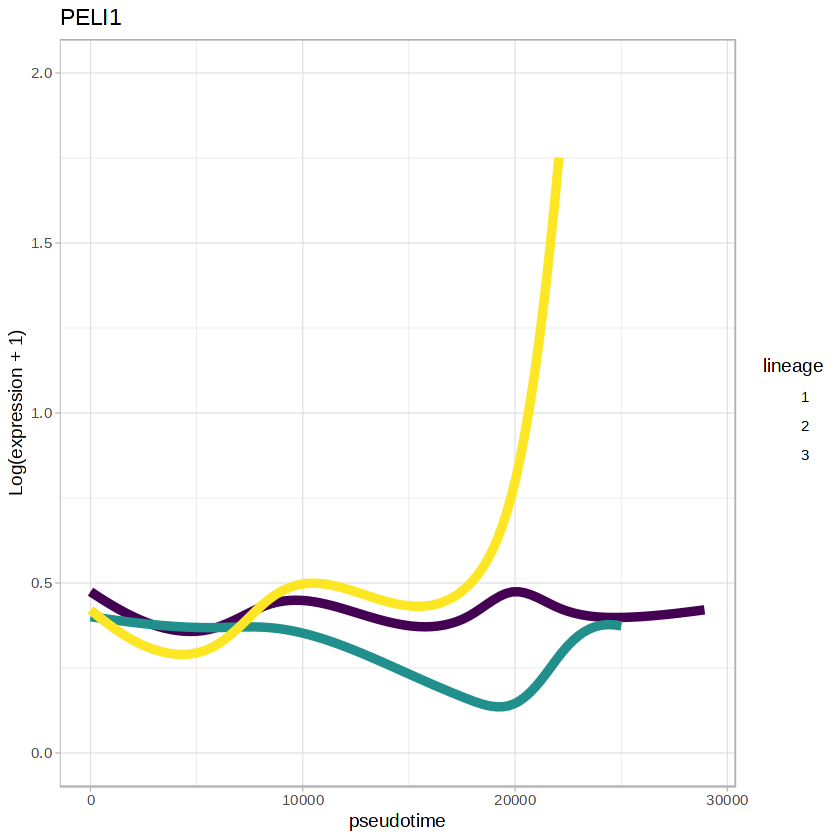

In [70]:
# PELI1 
PELI1 <- plotSmoothers(sce, counts, gene = 'PELI1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("PELI1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 2)
PELI1

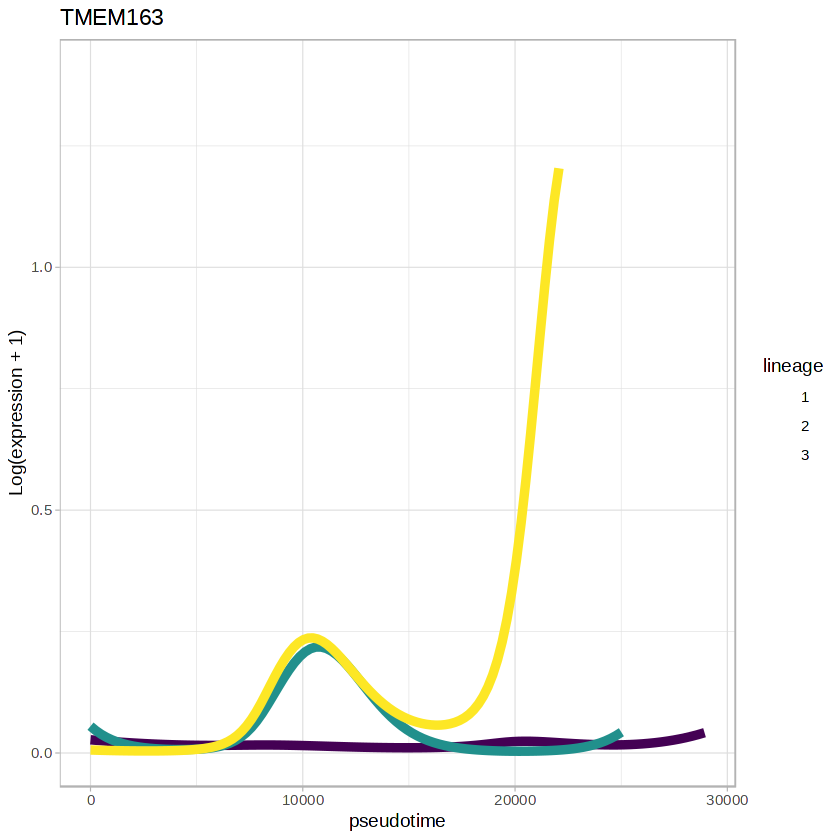

In [72]:
# TMEM163 
TMEM163 <- plotSmoothers(sce, counts, gene = 'TMEM163', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("TMEM163") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.4)
TMEM163

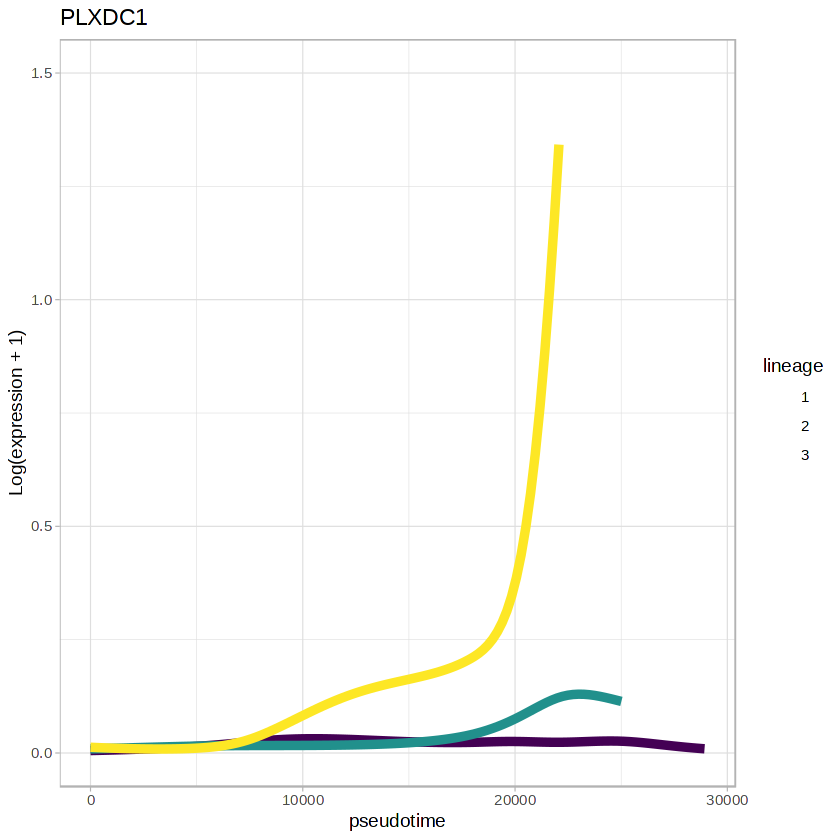

In [75]:
# PLXDC1 
PLXDC1 <- plotSmoothers(sce, counts, gene = 'PLXDC1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("PLXDC1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.5)
PLXDC1

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


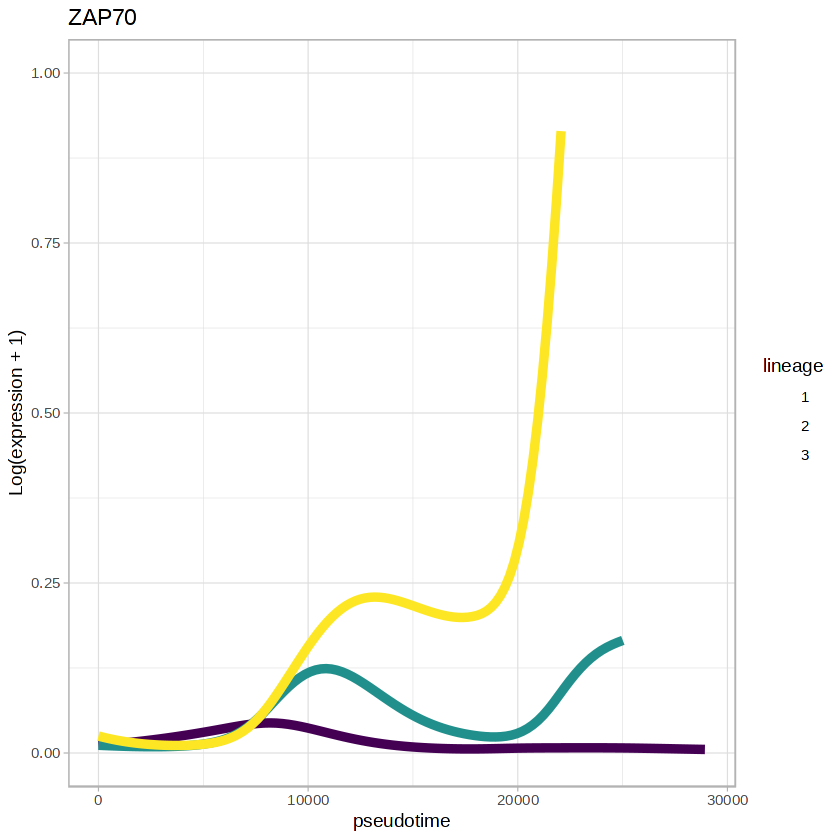

In [76]:
# ZAP70 
ZAP70 <- plotSmoothers(sce, counts, gene = 'ZAP70', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("ZAP70") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1)
ZAP70

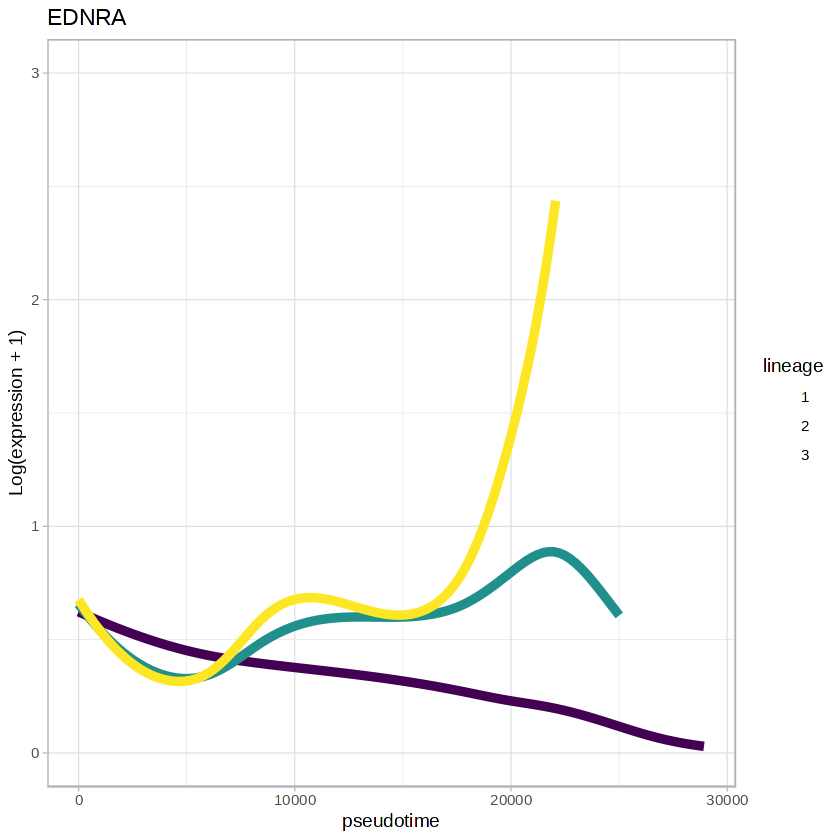

In [77]:
# EDNRA 
EDNRA <- plotSmoothers(sce, counts, gene = 'EDNRA', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("EDNRA") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 3)
EDNRA

Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


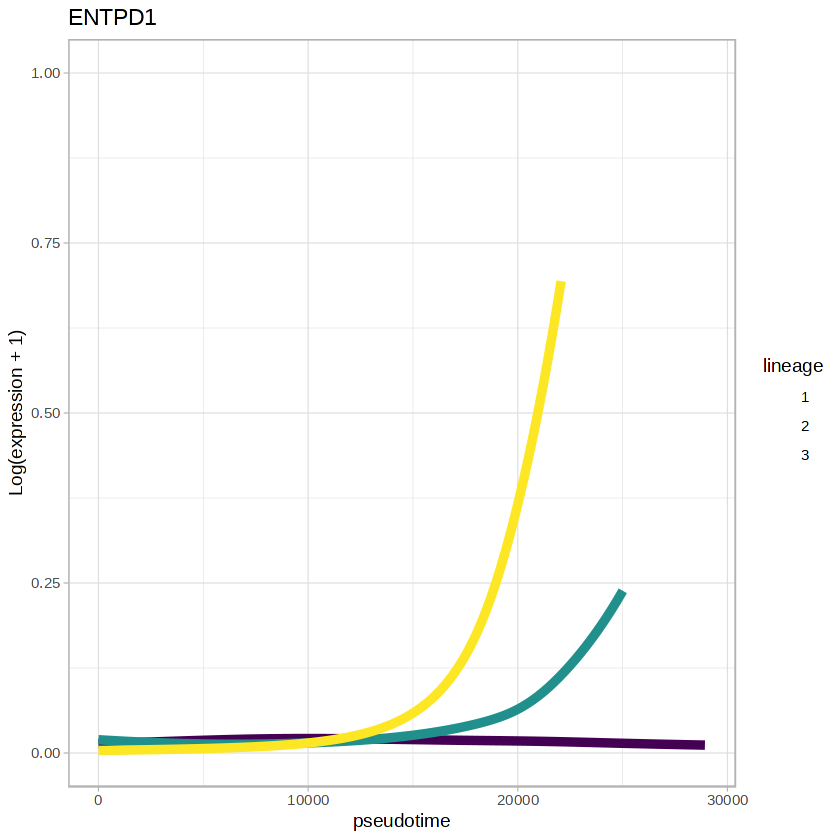

In [78]:
# ENTPD1 
ENTPD1 <- plotSmoothers(sce, counts, gene = 'ENTPD1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("ENTPD1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1)
ENTPD1


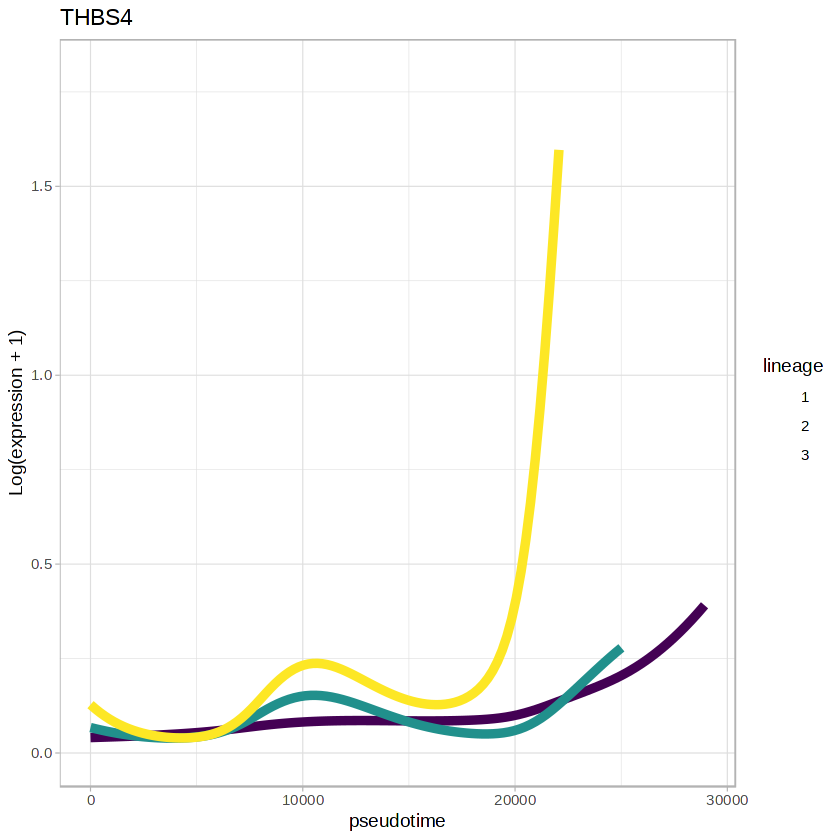

In [79]:
# THSB4 
THBS4 <- plotSmoothers(sce, counts, gene = 'THBS4', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("THBS4") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.8)
THBS4

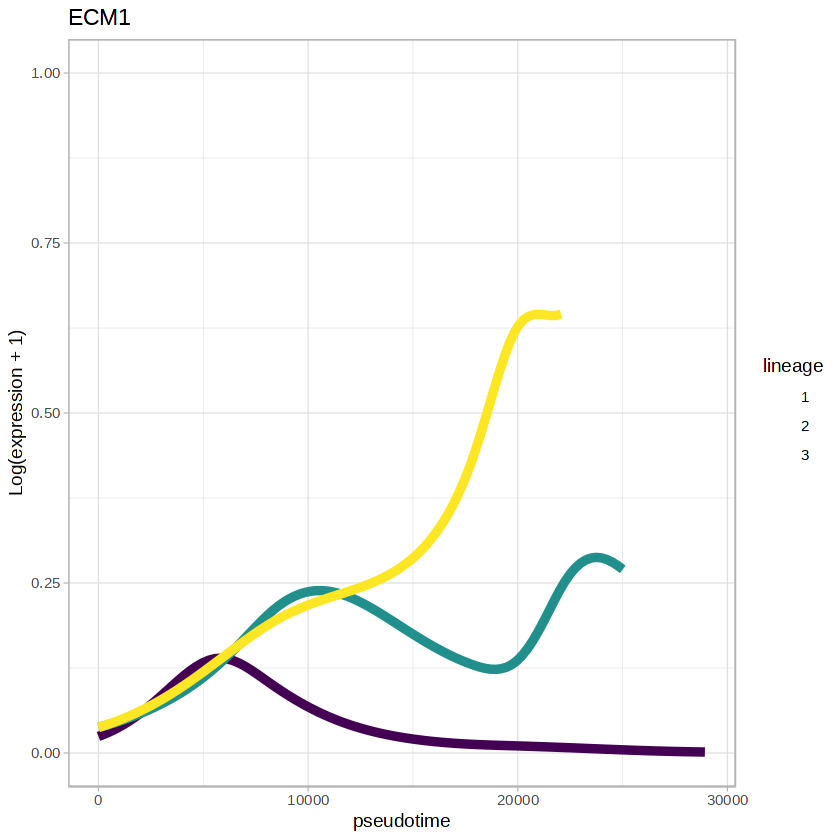

In [80]:
# ECM1 
ECM1 <- plotSmoothers(sce, counts, gene = 'ECM1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("ECM1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1)
ECM1

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”


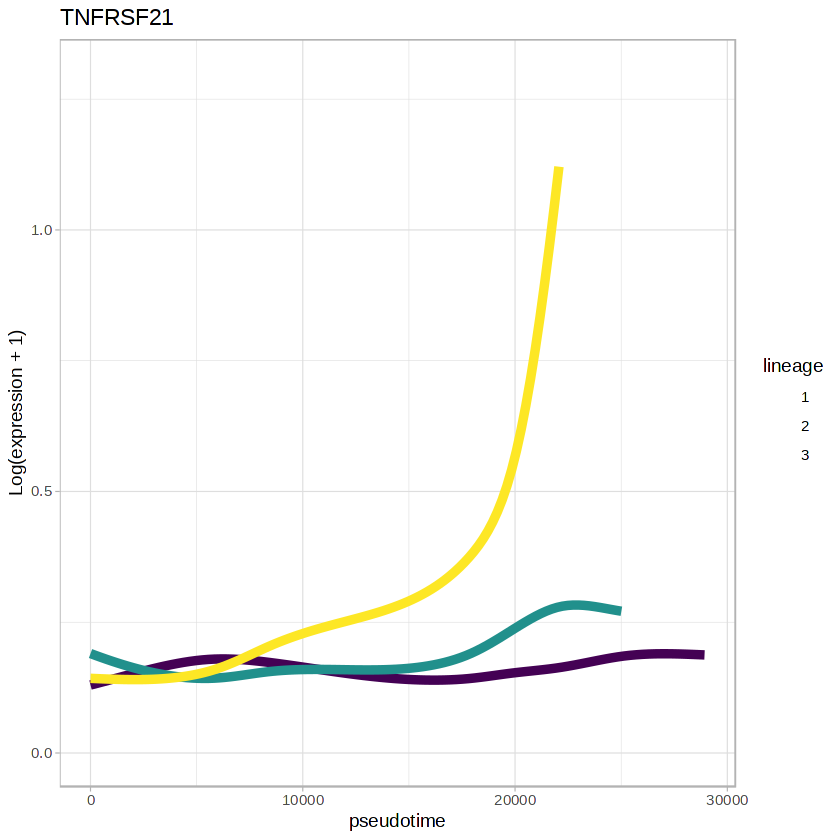

In [81]:
# TNFRSF21 
TNFRSF21 <- plotSmoothers(sce, counts, gene = 'TNFRSF21', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("TNFRSF21") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.3)
TNFRSF21


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


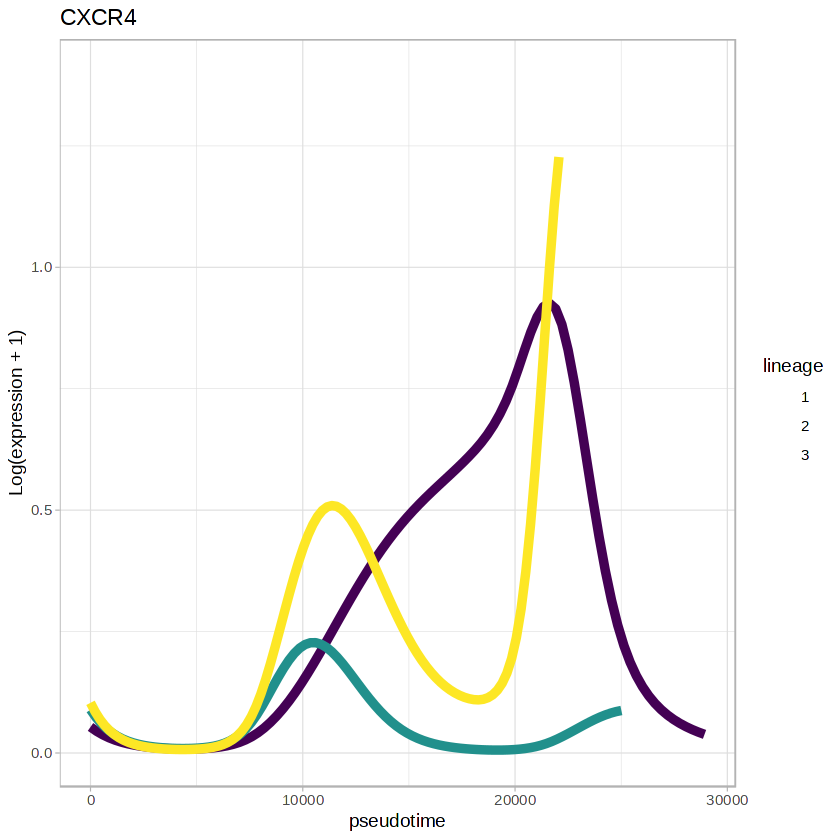

In [82]:
# CXCR4 
CXCR4 <- plotSmoothers(sce, counts, gene = 'CXCR4', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("CXCR4") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.4)
CXCR4


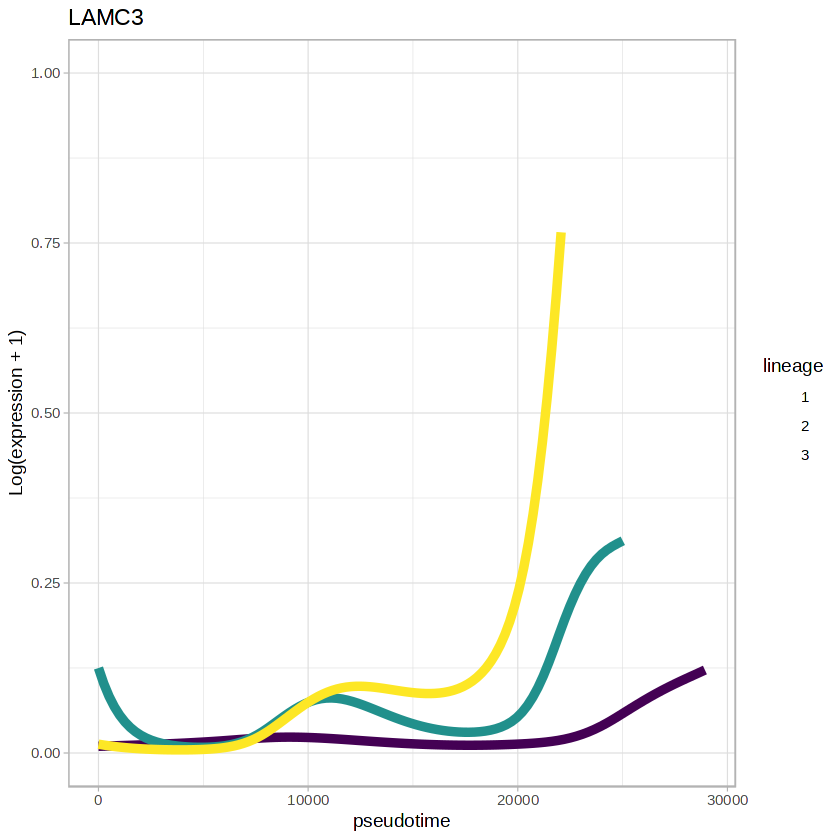

In [83]:
# LAMC3 
LAMC3 <- plotSmoothers(sce, counts, gene = 'LAMC3', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("LAMC3") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1)
LAMC3


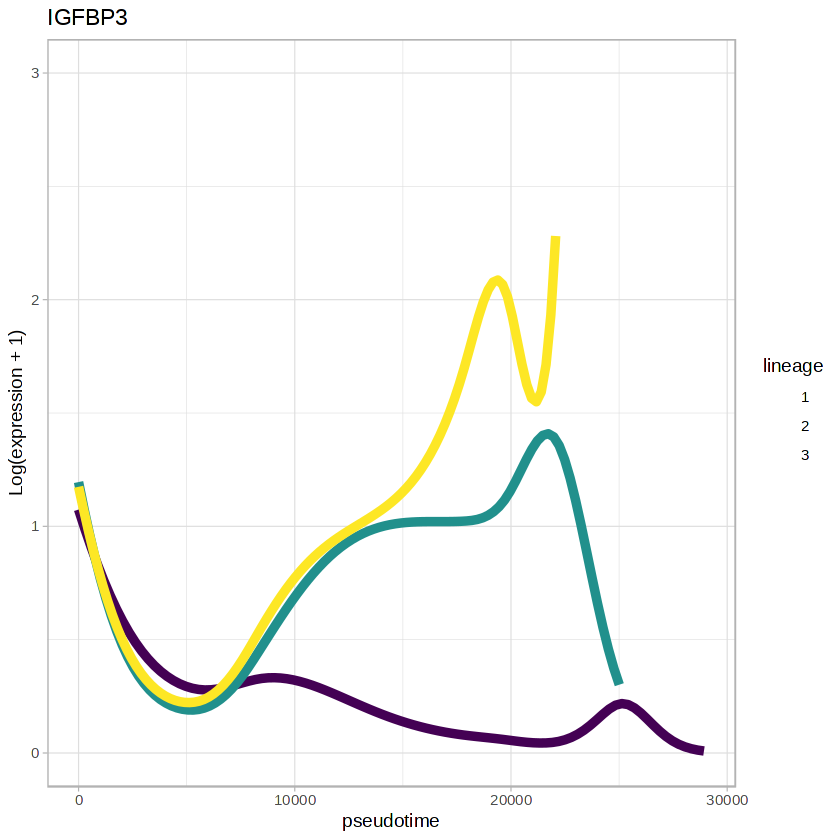

In [84]:
# IGFBP3 
IGFBP3 <- plotSmoothers(sce, counts, gene = 'IGFBP3', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("IGFBP3") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 3)
IGFBP3


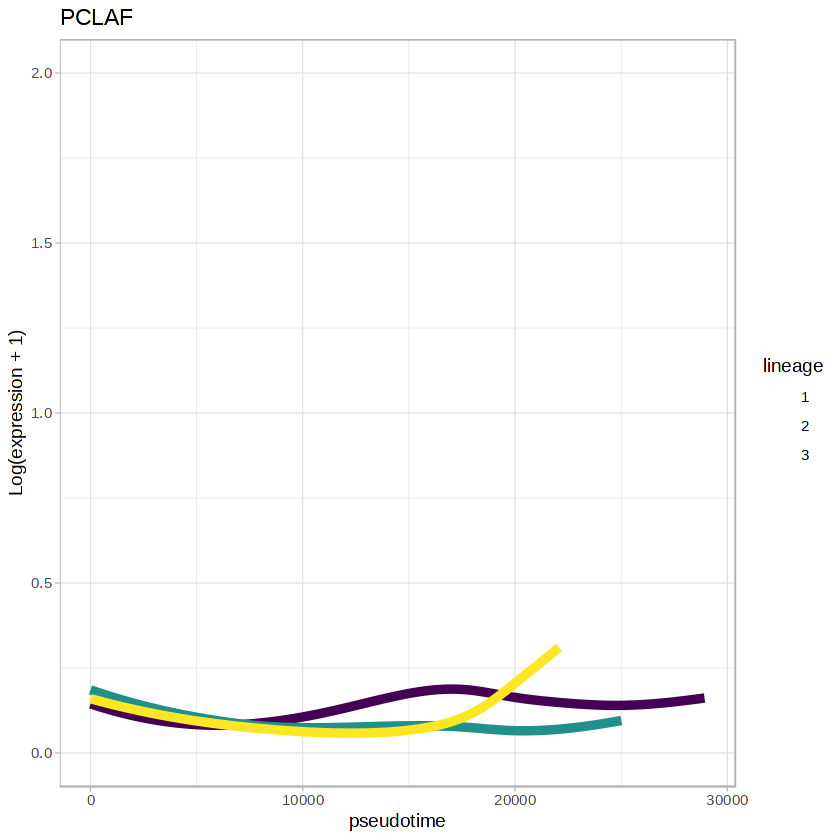

In [85]:
# PCLAF 
PCLAF <- plotSmoothers(sce, counts, gene = 'PCLAF', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("PCLAF") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 2)
PCLAF


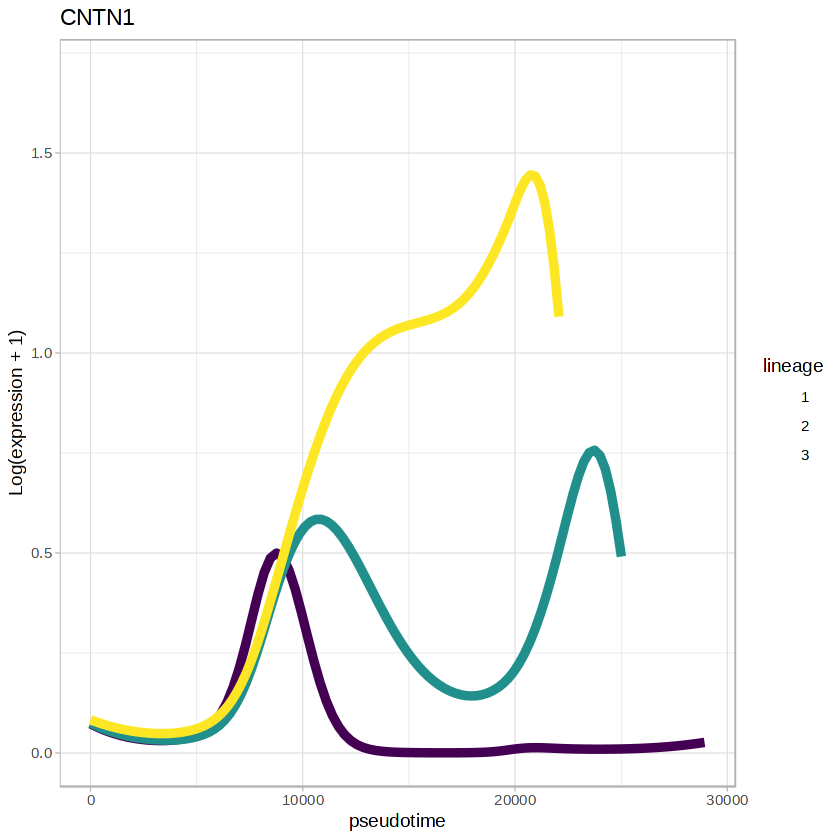

In [86]:
# CNTN1 
CNTN1 <- plotSmoothers(sce, counts, gene = 'CNTN1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("CNTN1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.7)
CNTN1


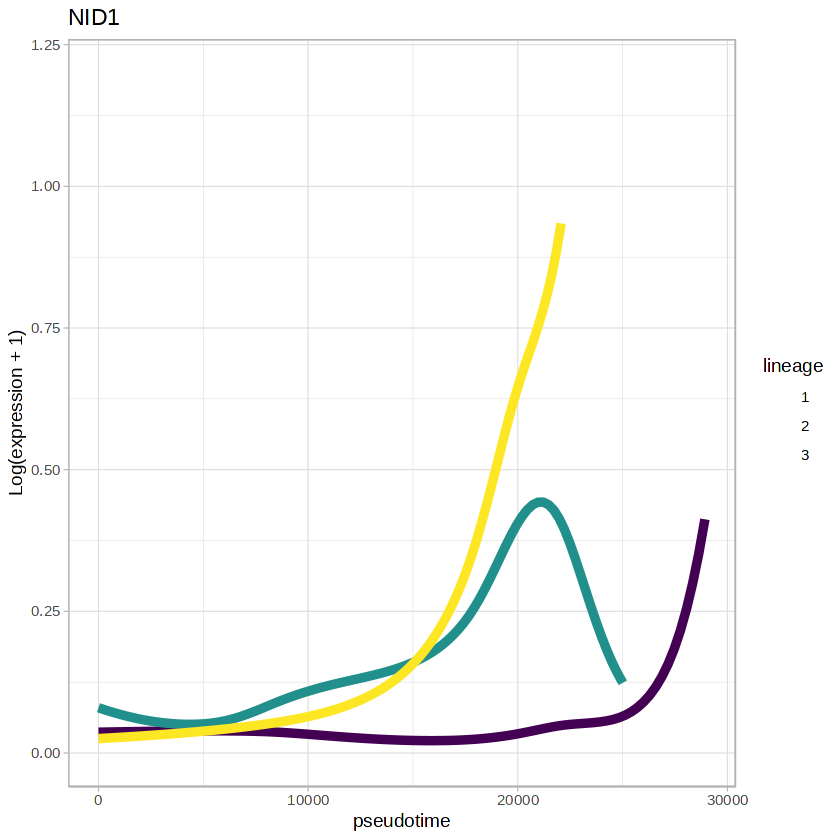

In [87]:
# PCLAF 
NID1 <- plotSmoothers(sce, counts, gene = 'NID1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("NID1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.2)
NID1


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


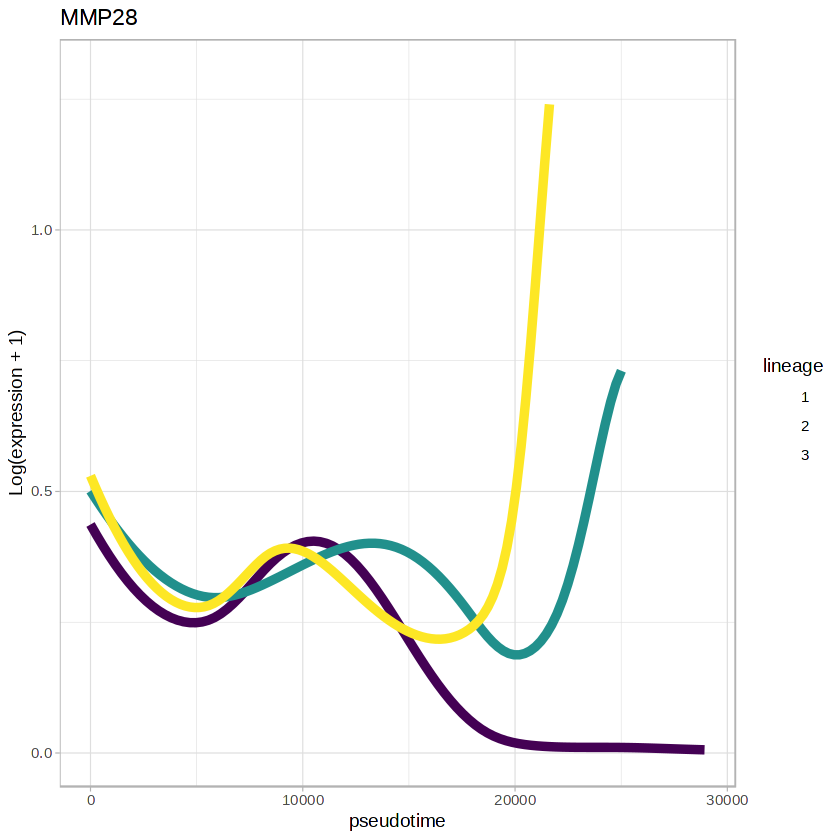

In [97]:
# MMP28 
MMP28 <- plotSmoothers(sce, counts, gene = 'MMP28', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("MMP28") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.3)
MMP28

In [89]:
library(grDevices)
library(RColorBrewer)
library(ggplot2)

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


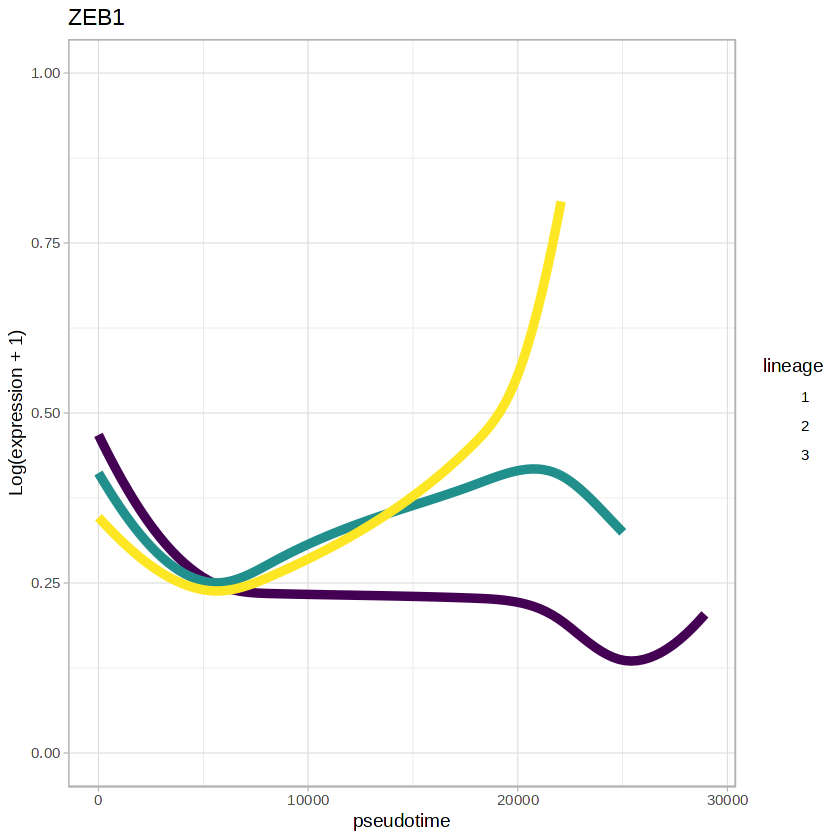

In [90]:
# ZEB1 
ZEB1 <- plotSmoothers(sce, counts, gene = 'ZEB1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("ZEB1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1)
ZEB1

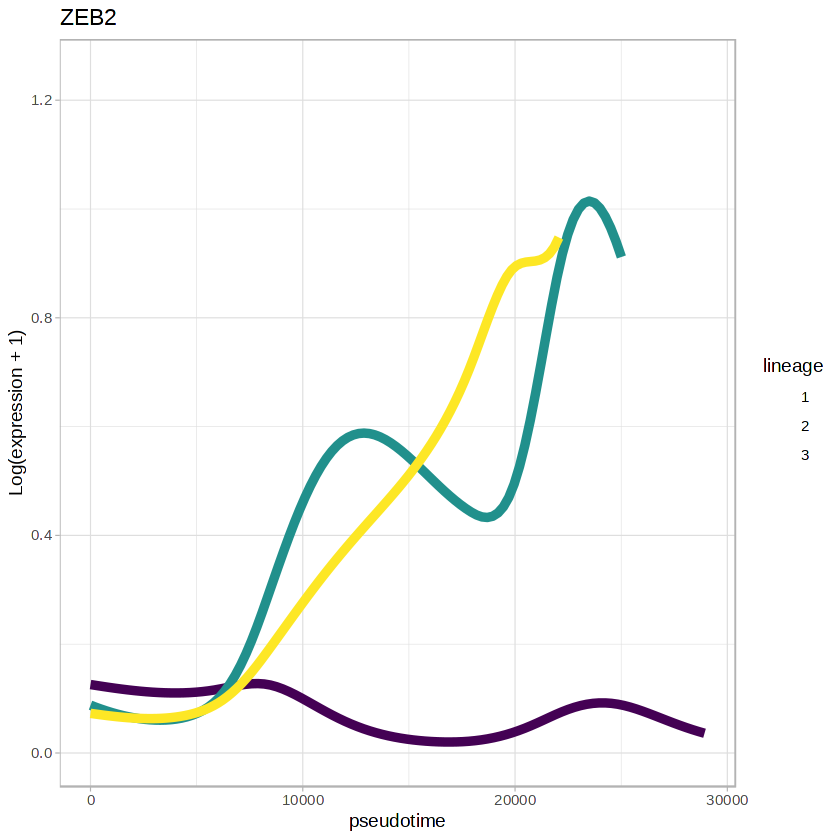

In [91]:
# ZEB2 
ZEB2 <- plotSmoothers(sce, counts, gene = 'ZEB2', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("ZEB2") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.25)
ZEB2

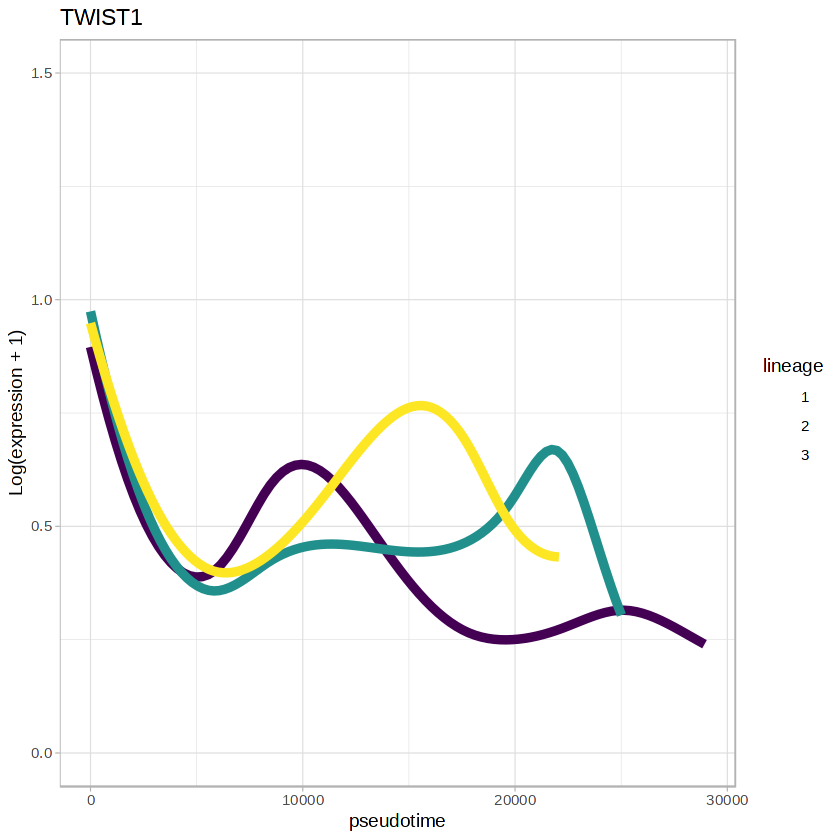

In [92]:
# TWIST1 
TWIST1 <- plotSmoothers(sce, counts, gene = 'TWIST1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("TWIST1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.5)
TWIST1

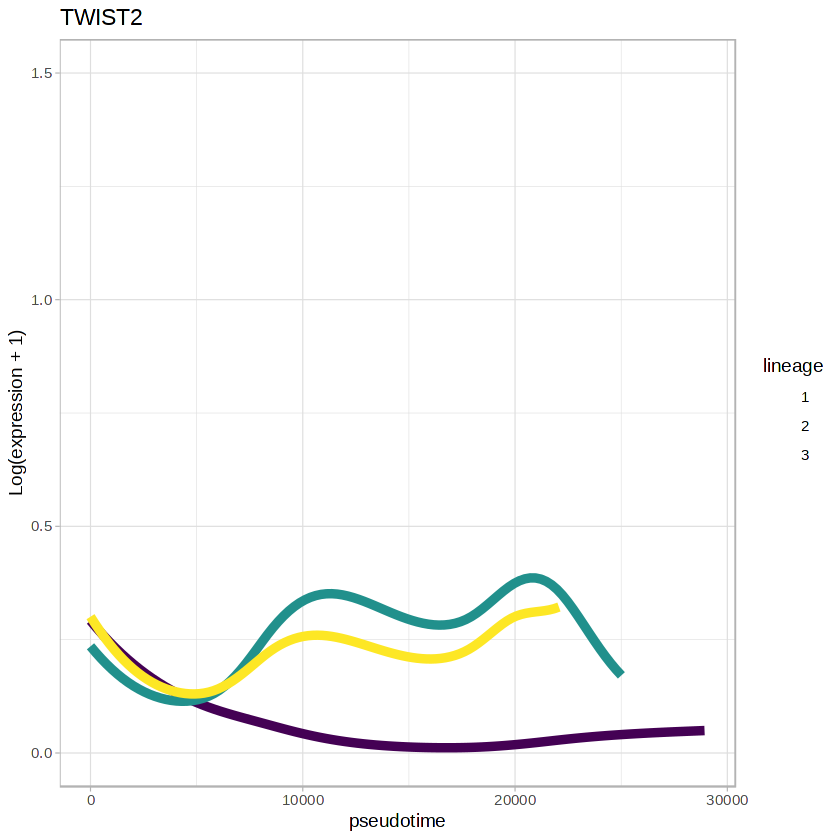

In [93]:
# TWIST2 
TWIST2 <- plotSmoothers(sce, counts, gene = 'TWIST2', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("TWIST2") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.5)
TWIST2

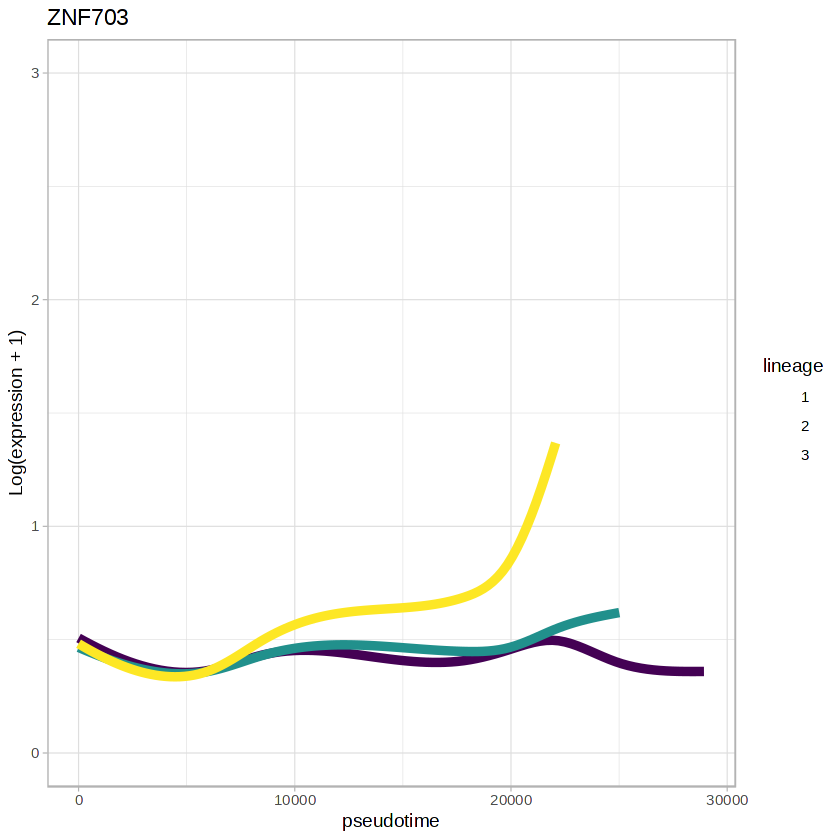

In [94]:
# SNAI1 
KLF8 <- plotSmoothers(sce, counts, gene = 'ZNF703', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("ZNF703") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 3)
KLF8

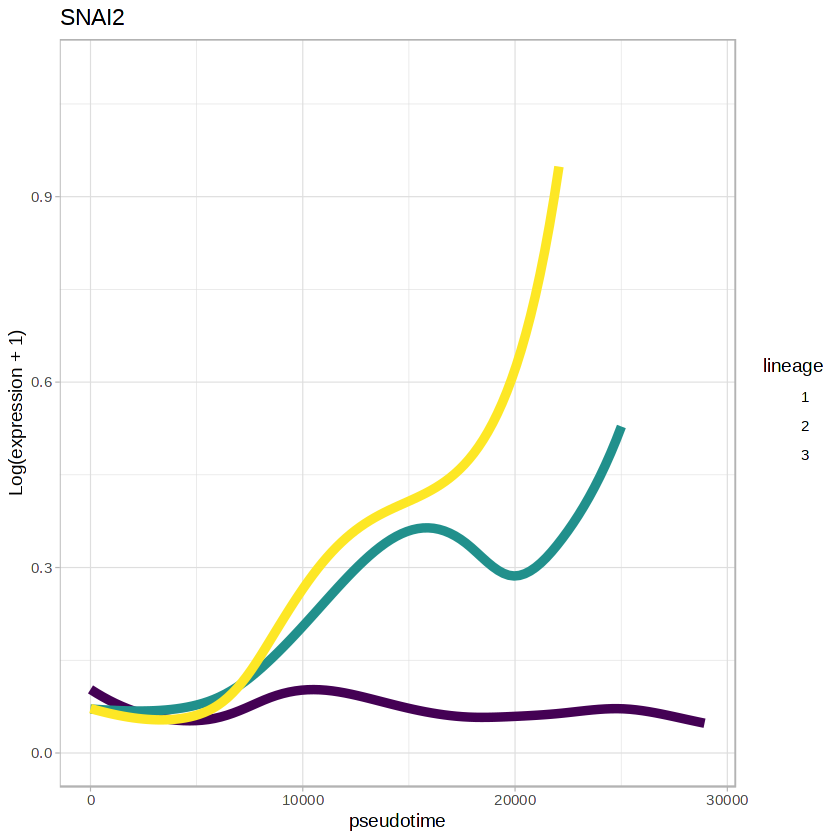

In [95]:
# SNAI2
SNAI2 <- plotSmoothers(sce, counts, gene = 'SNAI2', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("SNAI2") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.1)
SNAI2

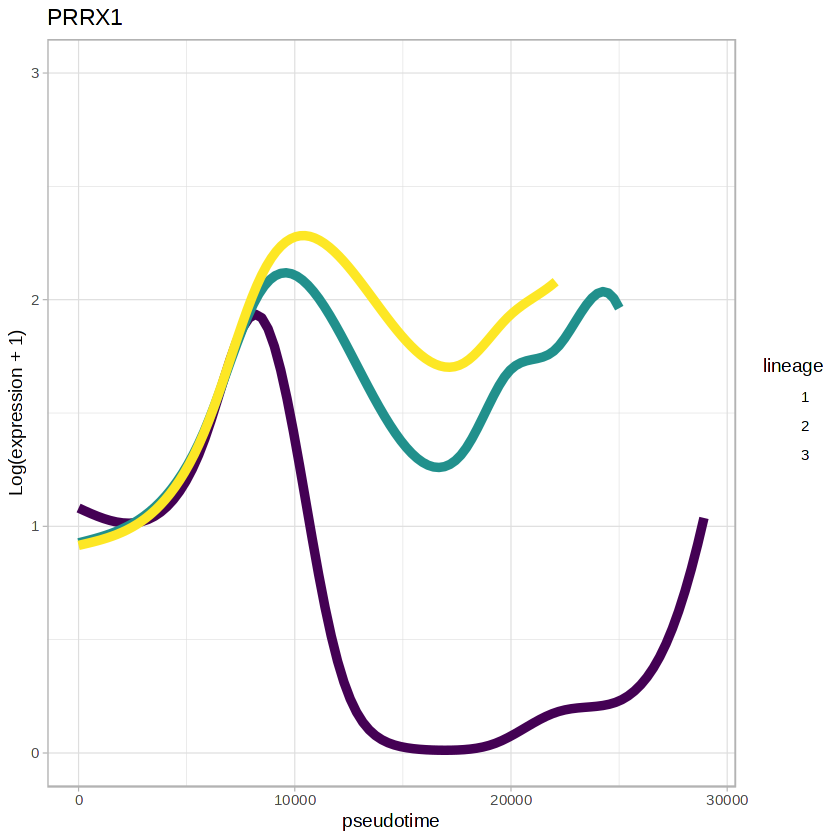

In [96]:
# PRX1
PRRX1 <- plotSmoothers(sce, counts, gene = 'PRRX1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("PRRX1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 3)
PRRX1

### Save plots

In [98]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine




Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


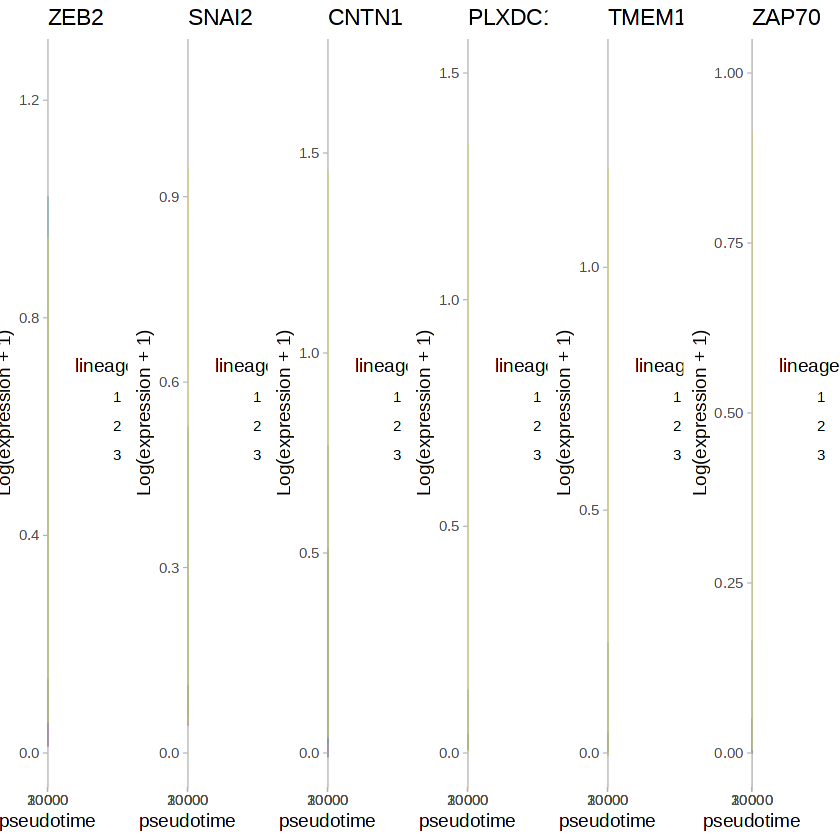

In [129]:
p_mullerian_mese_female <- grid.arrange(ZEB2, SNAI2, CNTN1, PLXDC1, TMEM163, ZAP70,
                                        nrow = 1, ncol = 6)

In [130]:
ggsave('/home/jovyan/RepTract/figures-epithelial/mullerian_mesenchyme_female_tradeseq.pdf',
       plot = p_mullerian_mese_female,
       width = 21, height = 3, dpi = 300)

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


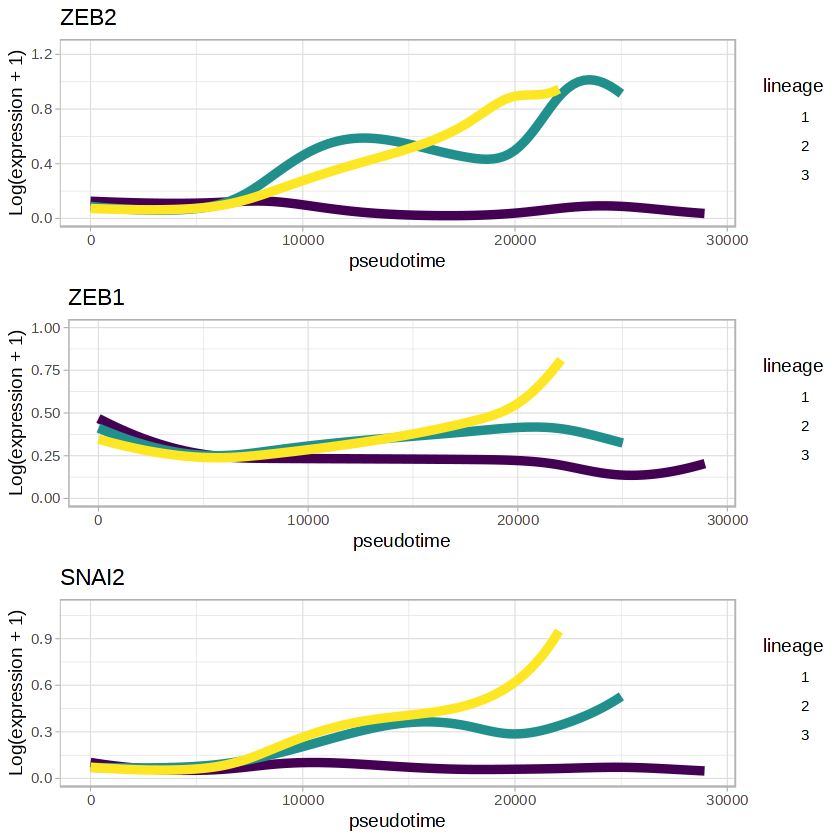

In [101]:
emt <- grid.arrange(ZEB2, ZEB1, SNAI2,
                                        nrow = 3, ncol = 1)

In [102]:
ggsave('/home/jovyan/RepTract/figures-epithelial/emt_tradeseq_vertical.pdf',
       plot = emt,
       width = 3.5, height = 9, dpi = 300)

## Mullerian mesenchyme male

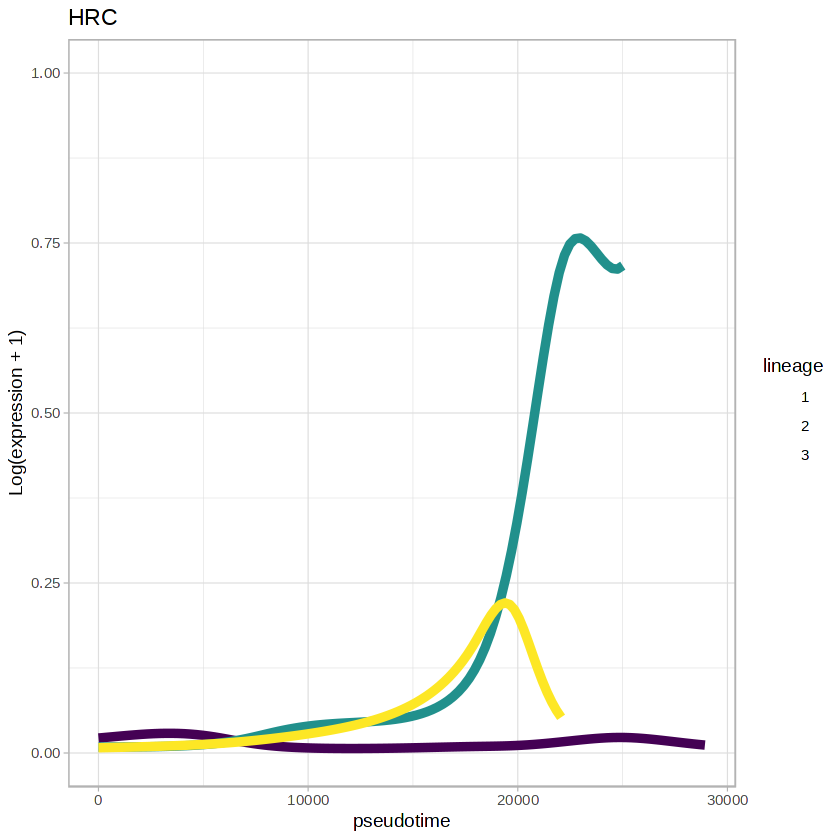

In [104]:
# HRC 
HRC <- plotSmoothers(sce, counts, gene = 'HRC', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("HRC") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1)
HRC


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


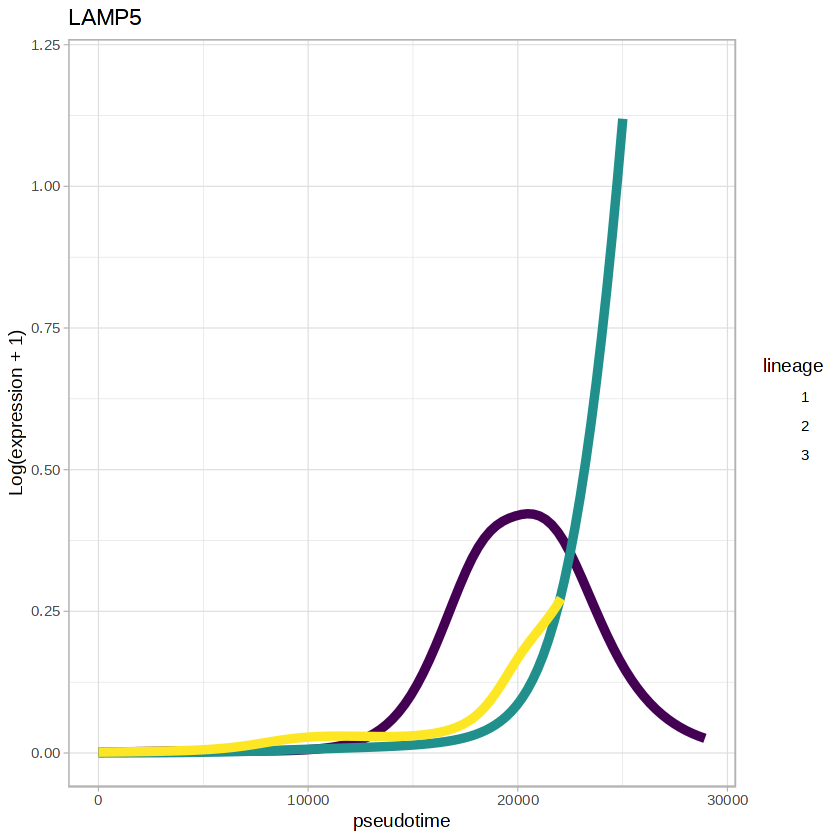

In [105]:
# HRC 
LAMP5 <- plotSmoothers(sce, counts, gene = 'LAMP5', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("LAMP5") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.2)
LAMP5


Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”


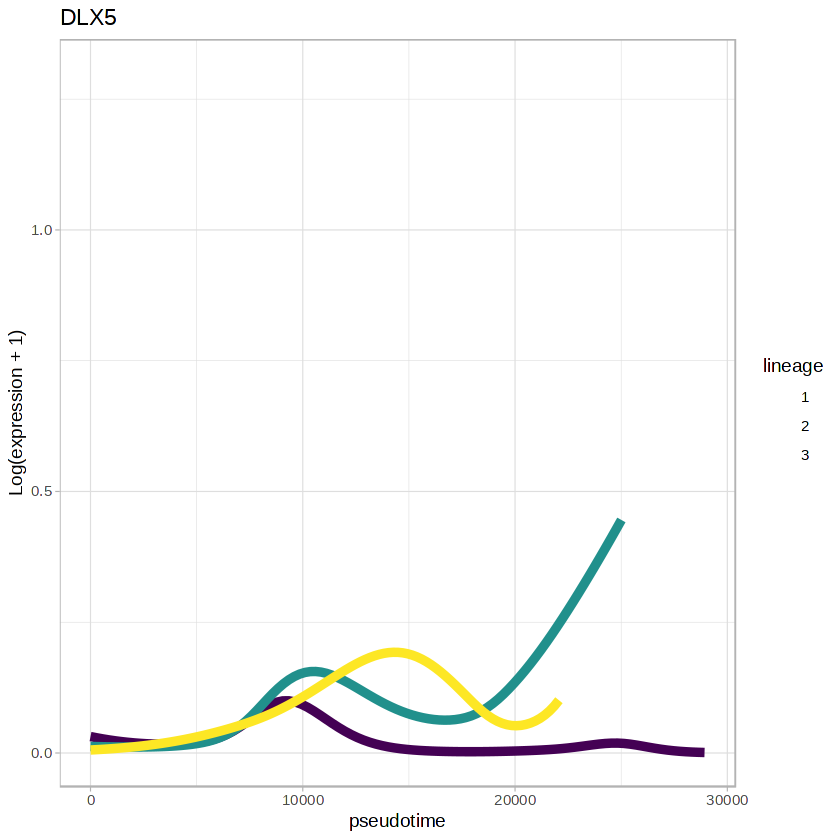

In [106]:
# HRC 
DLX5 <- plotSmoothers(sce, counts, gene = 'DLX5', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("DLX5") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.3)
DLX5


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


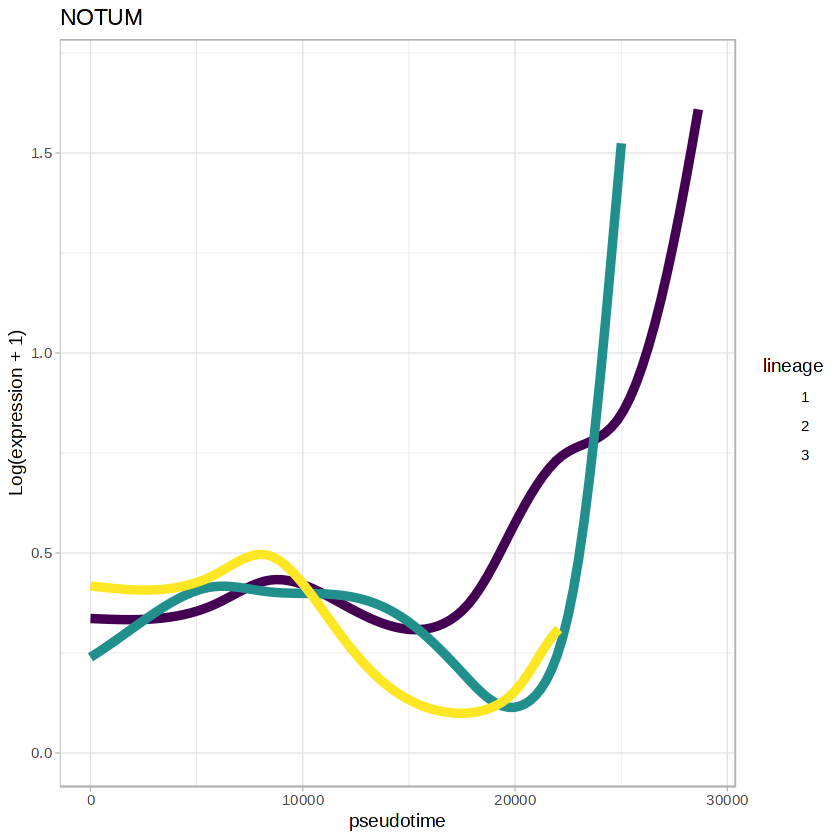

In [116]:
# NOTUM 
NOTUM <- plotSmoothers(sce, counts, gene = 'NOTUM', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("NOTUM") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.7)
NOTUM


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`).”


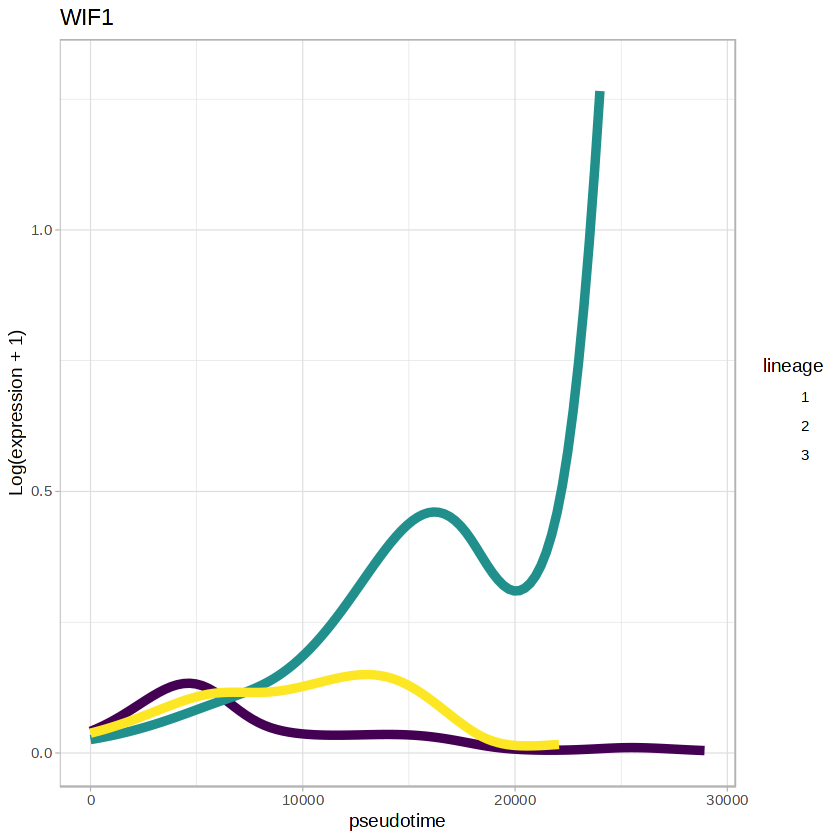

In [117]:
# WIF1 
WIF1 <- plotSmoothers(sce, counts, gene = 'WIF1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("WIF1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.3)
WIF1


Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”


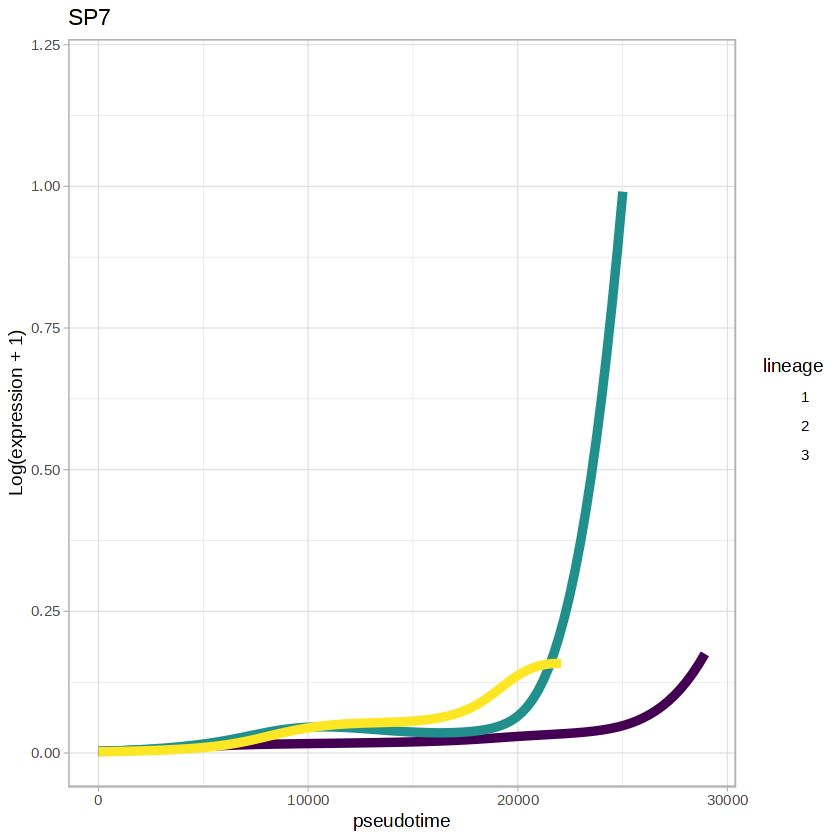

In [118]:
# SP7 
SP7 <- plotSmoothers(sce, counts, gene = 'SP7', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("SP7") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1.2)
SP7


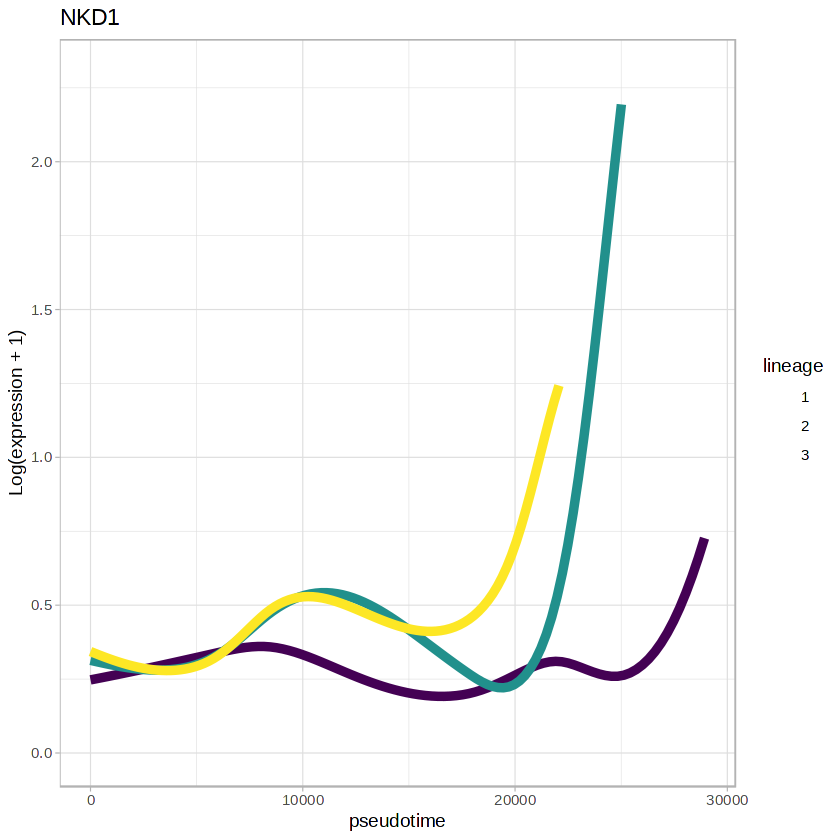

In [119]:
# NKD1 
NKD1 <- plotSmoothers(sce, counts, gene = 'NKD1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("NKD1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 2.3)
NKD1


Warning message:
“Removed 34 rows containing missing values or values outside the scale range
(`geom_point()`).”


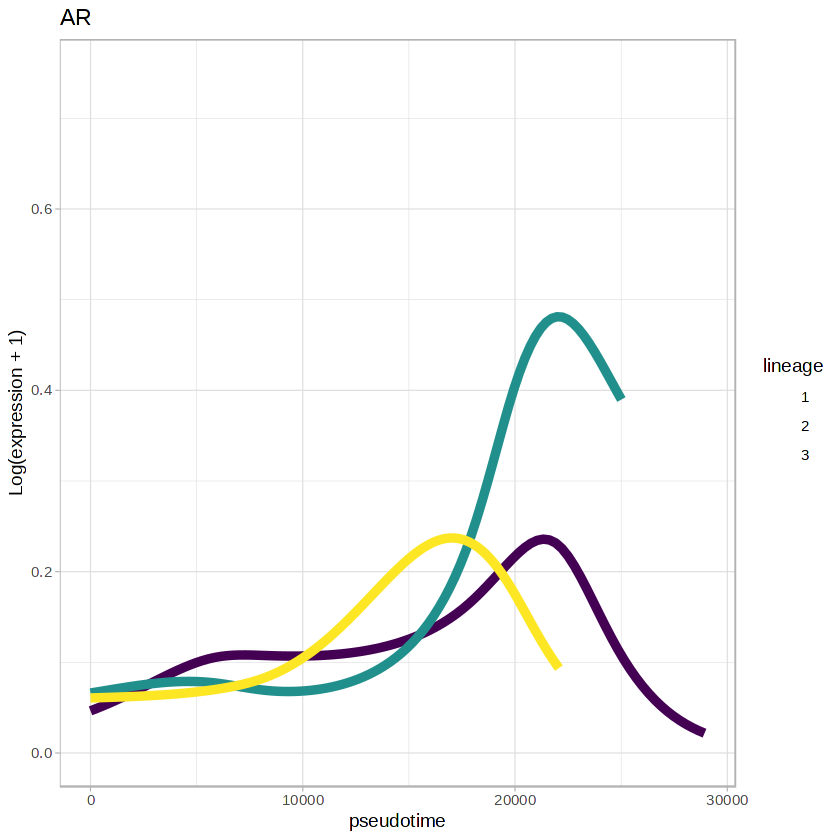

In [120]:
# AR 
AR <- plotSmoothers(sce, counts, gene = 'AR', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("AR") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 0.75)
AR


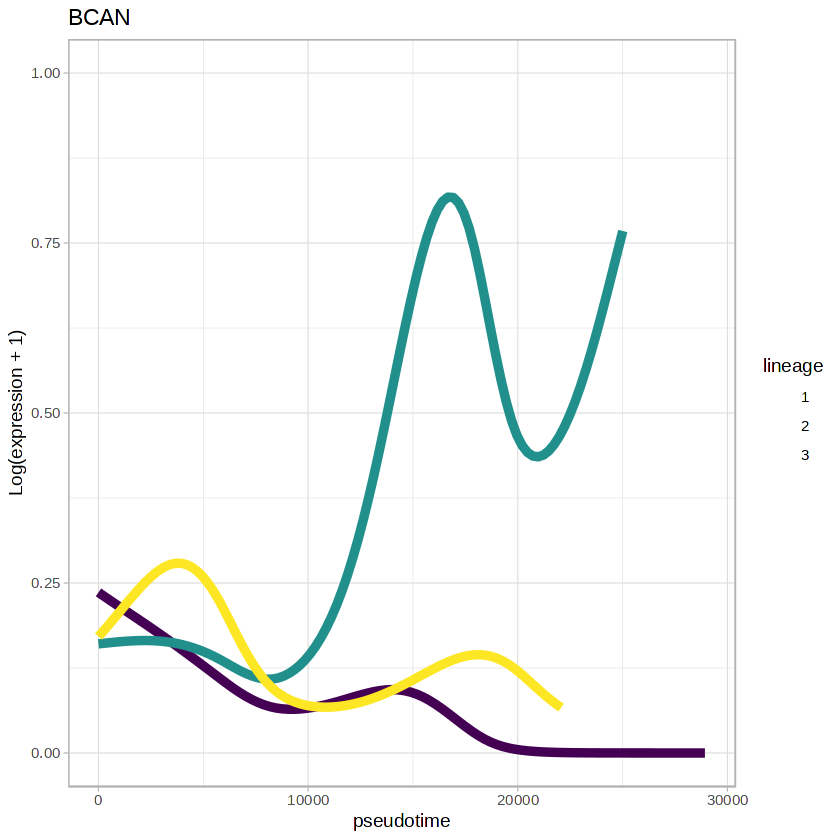

In [121]:
# AR 
BCAN <- plotSmoothers(sce, counts, gene = 'BCAN', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("BCAN") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 1)
BCAN


Warning message:
“Removed 50 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


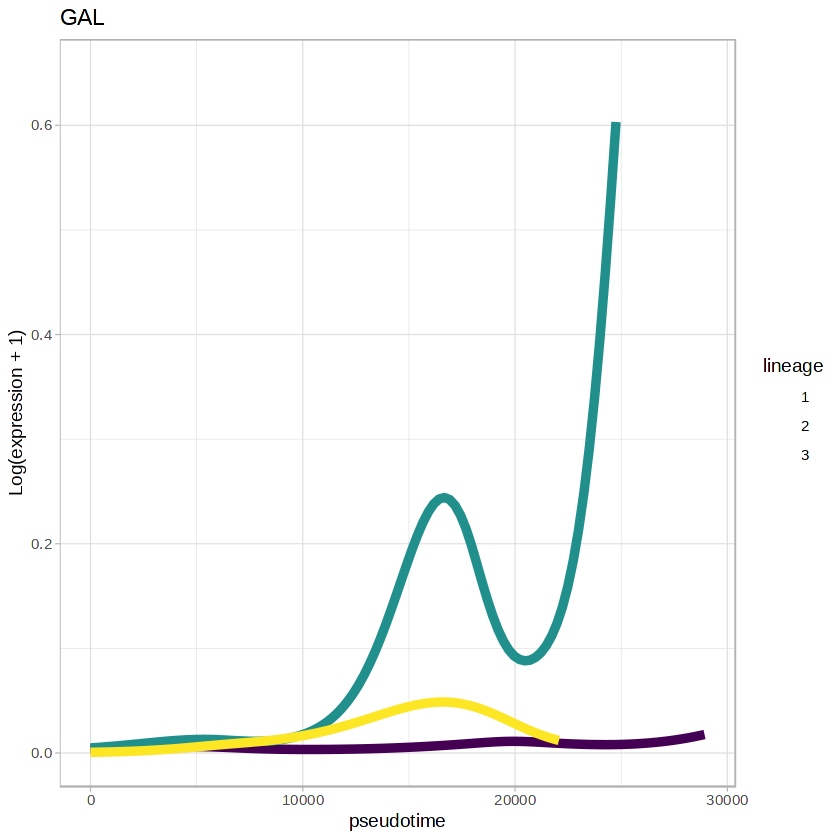

In [122]:
# AR 
GAL <- plotSmoothers(sce, counts, gene = 'GAL', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("GAL") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 0.65)
GAL


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


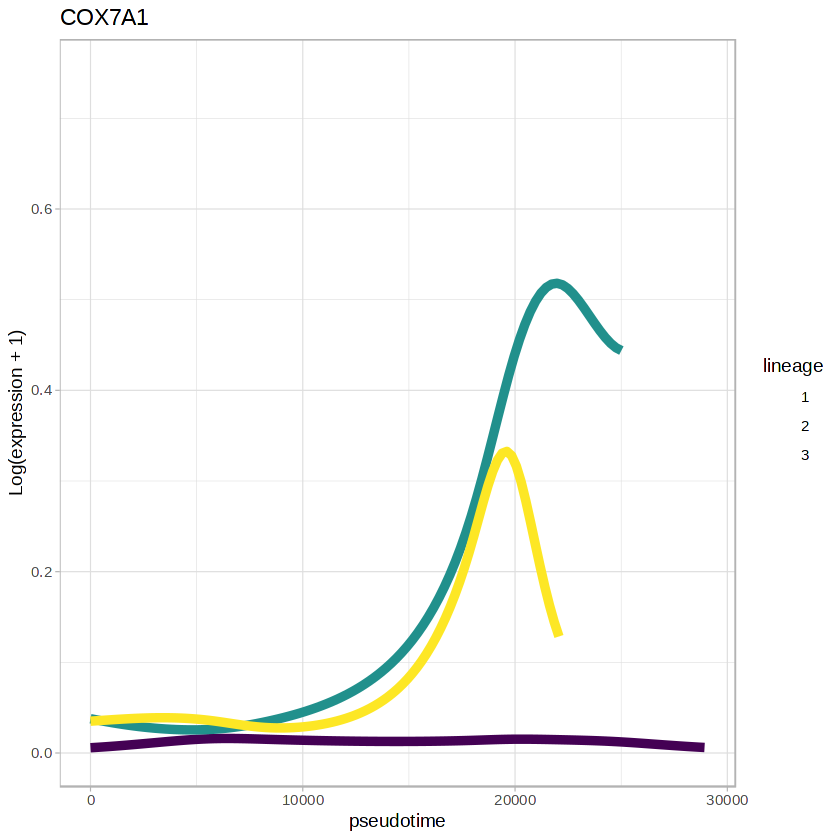

In [123]:
# AR 
COX7A1 <- plotSmoothers(sce, counts, gene = 'COX7A1', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("COX7A1") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 0.75)
COX7A1

Warning message:
“Removed 133 rows containing missing values or values outside the scale range
(`geom_point()`).”


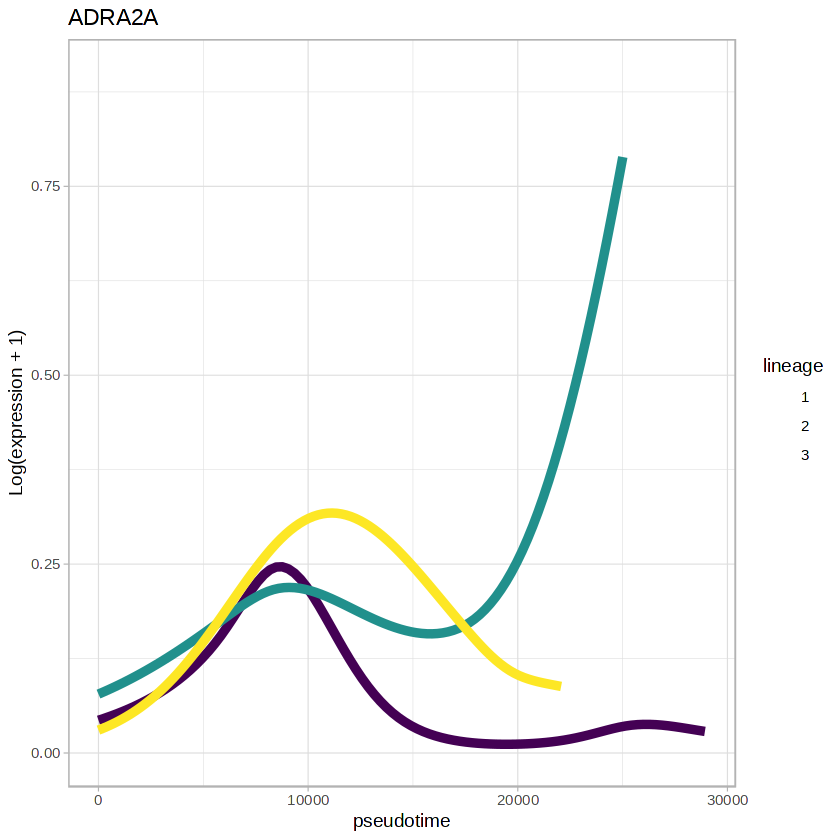

In [124]:
# AR 
ADRA2A <- plotSmoothers(sce, counts, gene = 'ADRA2A', alpha =0, 
                     xlab = "pseudotime",
  ylab = "Log(expression + 1)", border = FALSE) + ggtitle("ADRA2A") + theme(title = element_text(size = 20, face = 'bold'), axis.title=element_text(size=20), axis.text=element_text(size=20), legend.text = element_text(size=20),
     legend.title = element_text(size=20, face = "bold"))+ theme_light()+ ylim(0, 0.9)
ADRA2A

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 133 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 50 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


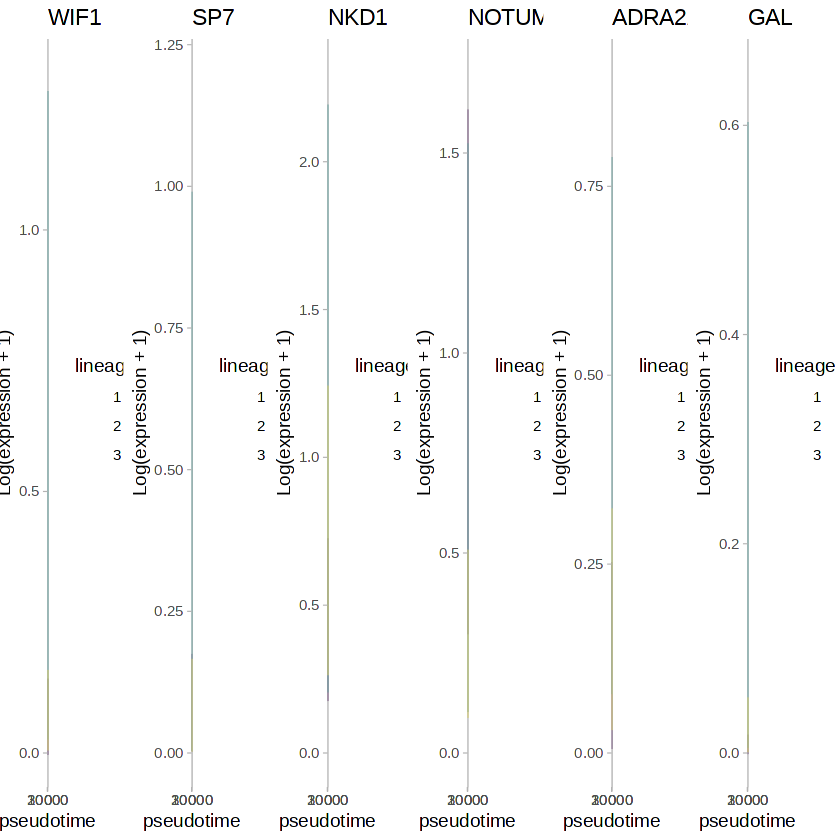

In [125]:
p_mullerian_mese_male <- grid.arrange(WIF1, SP7, NKD1, NOTUM, ADRA2A, GAL,  nrow = 1, ncol = 6)

In [126]:
ggsave('/home/jovyan/RepTract/figures-epithelial/mullerian_mesenchyme_male_tradeseq.pdf',
       plot = p_mullerian_mese_male,
       width = 21, height = 3, dpi = 300)


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 21 rows containing missing values or values outside the scale range
(`geom_point()`).”


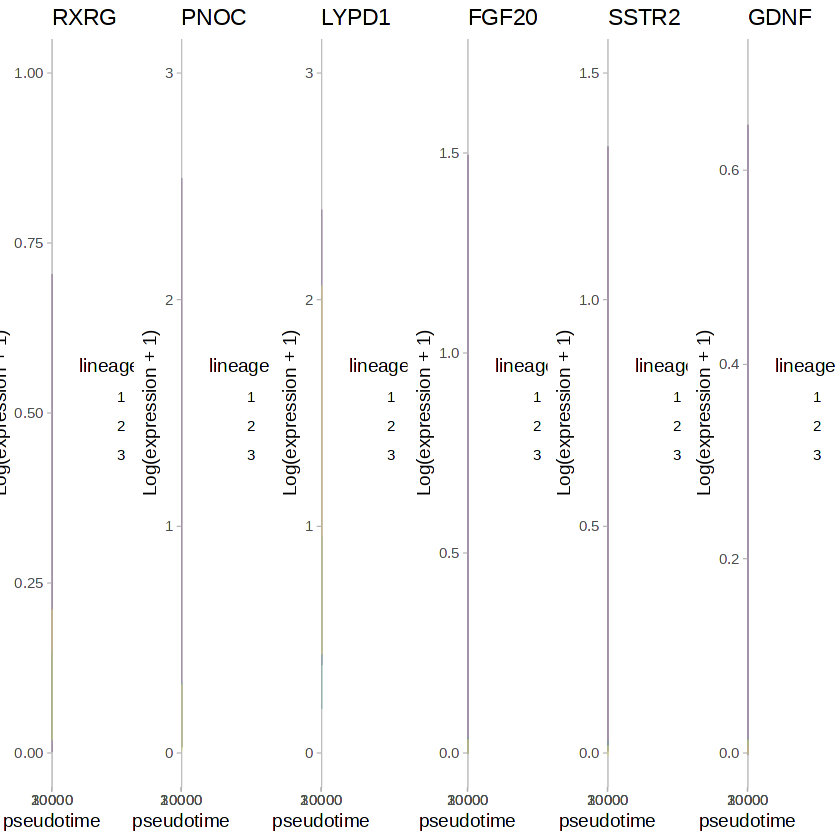

In [148]:
p_mullerian_epi <- grid.arrange(RXRG, PNOC, LYPD1, FGF20, SSTR2, GDNF, nrow = 1, ncol = 6)

In [149]:
ggsave('/home/jovyan/RepTract/figures-epithelial/mullerian_epithelium_tradeseq.pdf',
       plot = p_mullerian_epi,
       width = 21, height = 3, dpi = 300)


In [ ]:
p_mullerian_supp <- grid.arrange(CALCA, SSTR2, LGI1, LAMP5, nrow = 1, ncol = 4)

In [ ]:
ggsave('/home/jovyan/RepTract/figures-epithelial/mullerian_supplementary_tradeseq.pdf',
       plot = p_mullerian_supp,
       width = 14, height = 3, dpi = 300)
